# Анализ таблиц "bureau", "bureau_balance" и базовая модель

## Bureau

Посмотрим, что мы знаем о таблице bureau. Из соревнования:

`
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.`


### Посмотрим на таблицу.

In [1]:
import pandas as pd
import numpy as np
import helpers

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
BUREAU = pd.read_csv('data/bureau.csv')
BUREAU.sample(7, random_state=57)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1398183,139772,5292375,Closed,currency 1,-509,0,587.0,-104.0,NaN,0,476694.0,0.000,0.000,0.0,Consumer credit,-103,NaN
1353102,117300,5435818,Closed,currency 1,-651,0,-592.0,-631.0,NaN,0,13500.0,0.000,NaN,0.0,Consumer credit,-631,3631.5
1505639,124677,5993683,Active,currency 1,-1184,0,27281.0,NaN,0.0,2,465750.0,320688.495,145061.505,0.0,Credit card,-7,4500.0
454464,161107,5035529,Active,currency 1,-795,0,-611.0,NaN,0.0,0,108000.0,0.000,0.000,0.0,Consumer credit,-85,20160.0
1086504,160035,6214688,Closed,currency 1,-1342,0,-1159.0,-1159.0,0.0,0,44955.0,0.000,0.000,0.0,Consumer credit,-1056,NaN
5267,454040,5720794,Closed,currency 1,-1035,0,-304.0,-273.0,NaN,0,450000.0,0.000,NaN,0.0,Consumer credit,-273,NaN
985204,189290,5075575,Active,currency 1,-1156,0,-861.0,NaN,NaN,0,50233.5,41818.500,NaN,0.0,Consumer credit,-389,NaN


In [4]:
BUREAU.shape

(1716428, 17)

In [5]:
helpers.get_df_general_stats(BUREAU)

,CountNaN,RateNaN%,CountUnique,MinValue,MaxValue,Mean,Std,Median
SK_ID_CURR,0,0,305811,100001.000,4.562550e+05,2.782149e+05,1.029386e+05,278055.0
SK_ID_BUREAU,0,0,1716428,5000000.000,6.843457e+06,5.924434e+06,5.322657e+05,5926303.5
CREDIT_ACTIVE,0,0,4,NaN,NaN,NaN,NaN,NaN
CREDIT_CURRENCY,0,0,4,NaN,NaN,NaN,NaN,NaN
DAYS_CREDIT,0,0,2923,-2922.000,0.000000e+00,-1.142108e+03,7.951649e+02,-987.0
CREDIT_DAY_OVERDUE,0,0,942,0.000,2.792000e+03,8.181666e-01,3.654443e+01,0.0
DAYS_CREDIT_ENDDATE,105553,6,14096,-42060.000,3.119900e+04,5.105174e+02,4.994220e+03,-330.0
DAYS_ENDDATE_FACT,633653,36,2917,-42023.000,0.000000e+00,-1.017437e+03,7.140106e+02,-897.0
AMT_CREDIT_MAX_OVERDUE,1124488,65,68251,0.000,1.159872e+08,3.825418e+03,2.060316e+05,0.0
CNT_CREDIT_PROLONG,0,0,10,0.000,9.000000e+00,6.410406e-03,9.622391e-02,0.0


In [6]:
BUREAU_CATEGORICAL_FEATURES = [
    'CREDIT_ACTIVE',
    'CREDIT_CURRENCY',
    'CREDIT_TYPE',
]
BUREAU_NUMERIC_FEATURES = [
    'SK_ID_CURR',
    'SK_ID_BUREAU',
    'DAYS_CREDIT',
    'CREDIT_DAY_OVERDUE',
    'DAYS_CREDIT_ENDDATE',
    'DAYS_ENDDATE_FACT',
    'AMT_CREDIT_MAX_OVERDUE',
    'CNT_CREDIT_PROLONG',
    'AMT_CREDIT_SUM',
    'AMT_CREDIT_SUM_DEBT',
    'AMT_CREDIT_SUM_LIMIT',
    'AMT_CREDIT_SUM_OVERDUE',
    'DAYS_CREDIT_UPDATE',
    'AMT_ANNUITY',
]

In [7]:
assert set(BUREAU_CATEGORICAL_FEATURES + BUREAU_NUMERIC_FEATURES) == set(np.array(BUREAU.columns))

Начнем с анализа категориальных данных: посмотрим на 'CREDIT_ACTIVE', 'CREDIT_CURRENCY'.

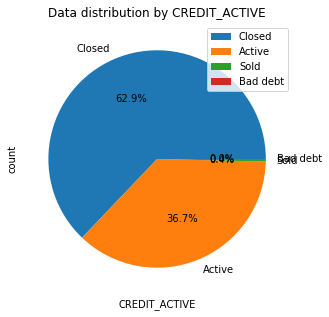

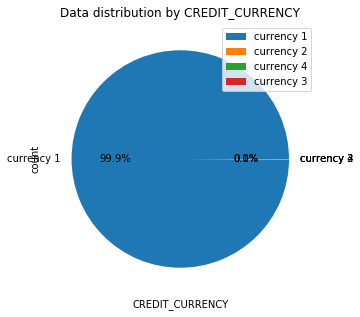

In [8]:
helpers.draw_pies_for_columns(['CREDIT_ACTIVE', 'CREDIT_CURRENCY'], BUREAU)

Видим, что в 'CREDIT_ACTIVE' очень малое количество значений 'Sold' и 'Bad debt'. Их не будем рассматривать как отдельные категории.
По графику 'CREDIT_CURRENCY' видно, что этот признак бесполезен, так как здесь наблюдается сильное преобладание одного из значений. Удалим этот признак из выборки.

In [9]:
BUREAU.drop(columns=['CREDIT_CURRENCY'], inplace=True)

Теперь проанализируем последний категориальный признак.

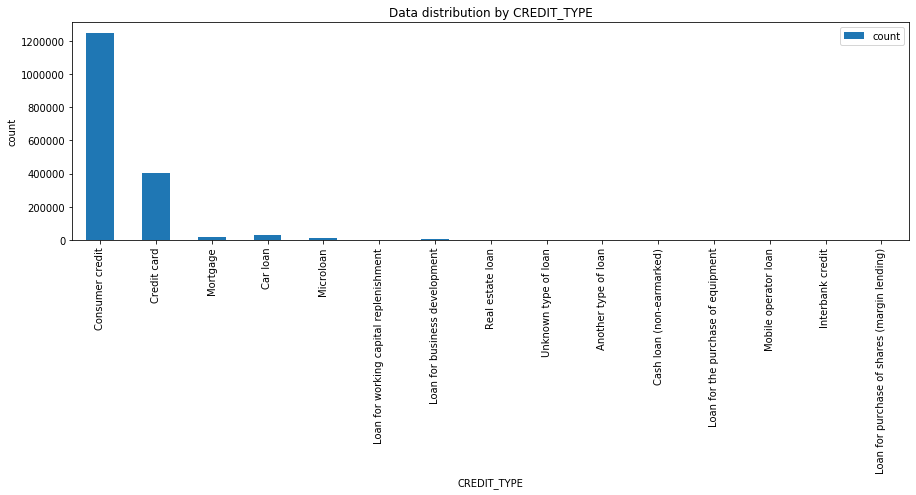

In [10]:
helpers.draw_hists_for_categorical_columns(['CREDIT_TYPE'], BUREAU)

Видим опять довольно неприятное распределение. Причем не хочется смешивать различные значения этого признака.
Поэтому категории с малым количеством данных использовать нет смысла.

Теперь рассмотрим численные признаки.

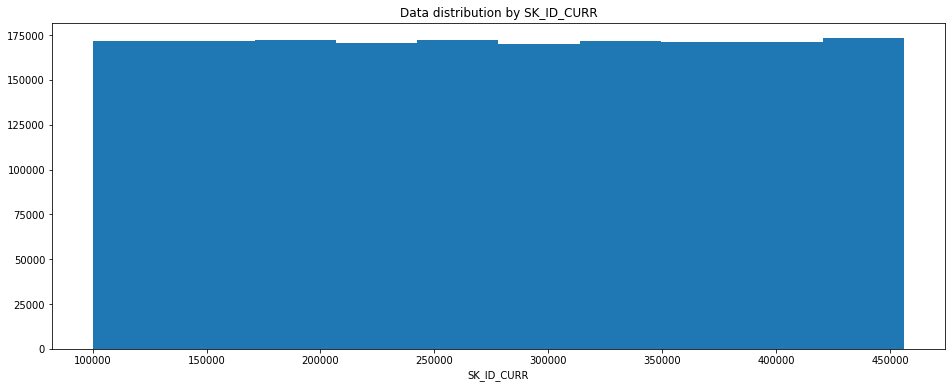

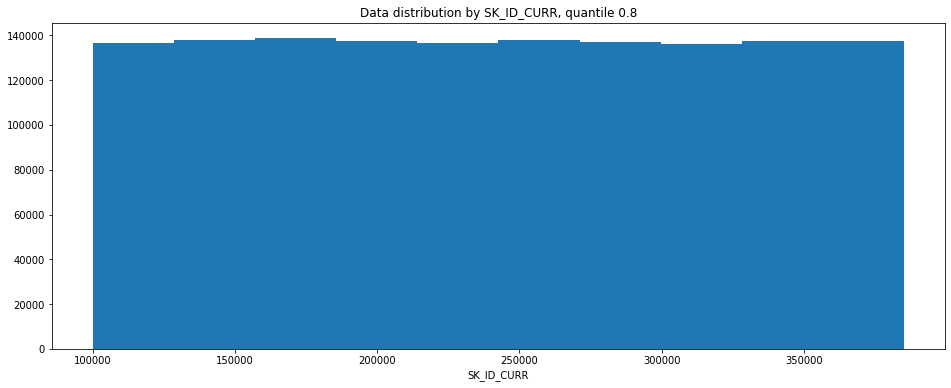

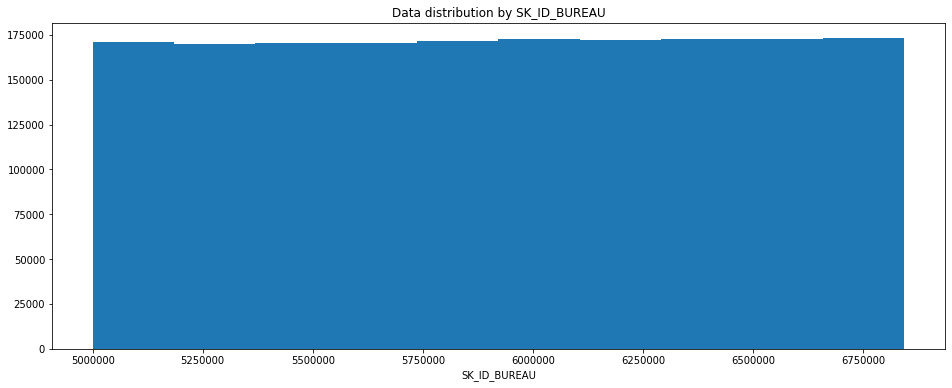

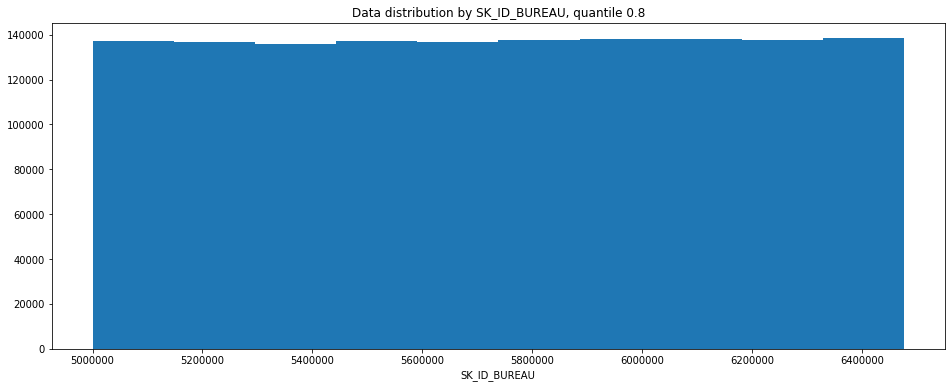

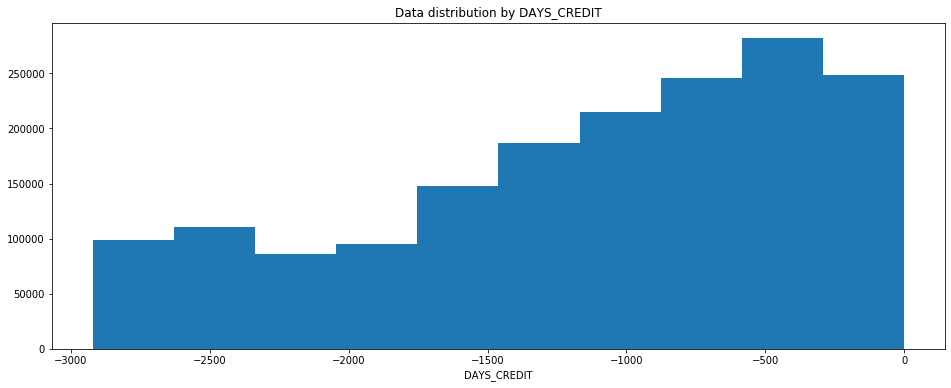

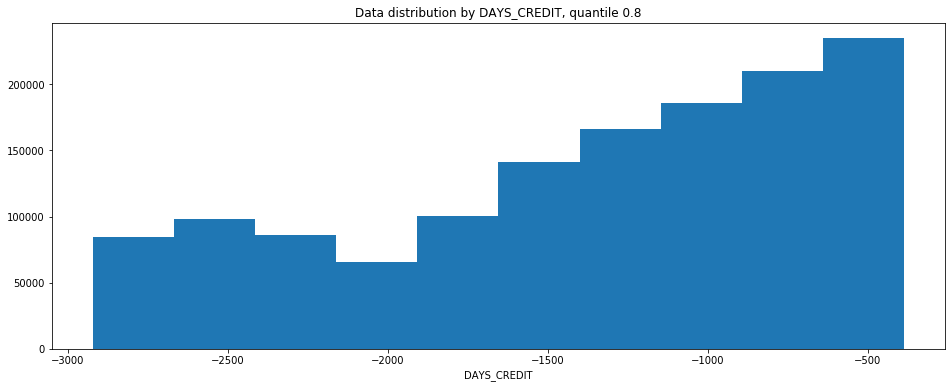

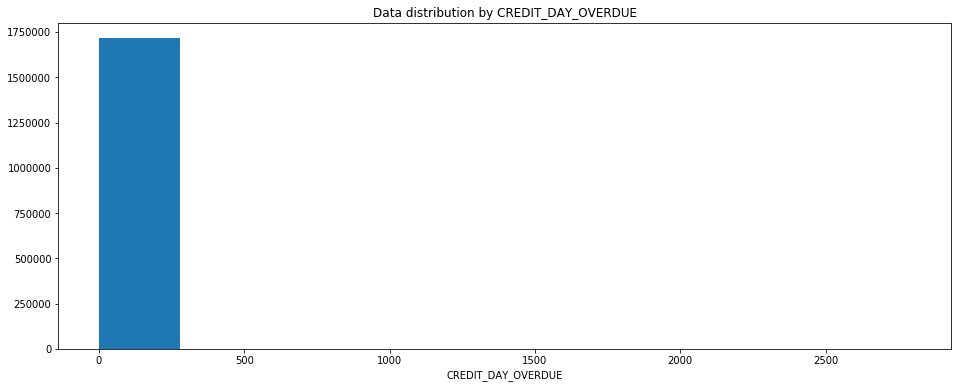

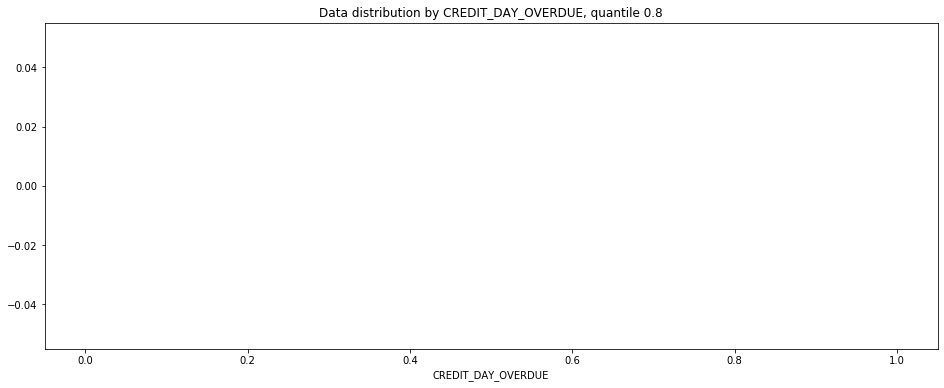

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


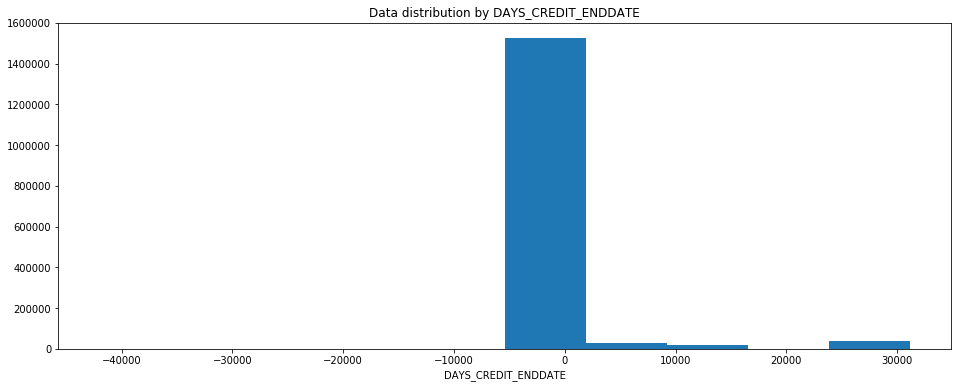

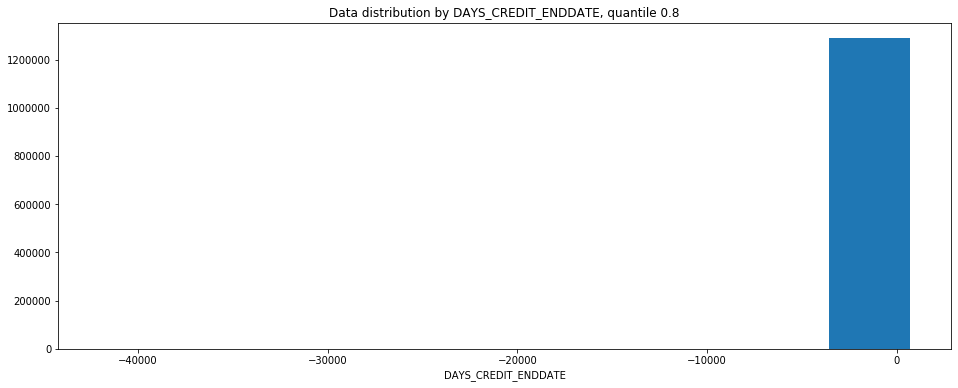

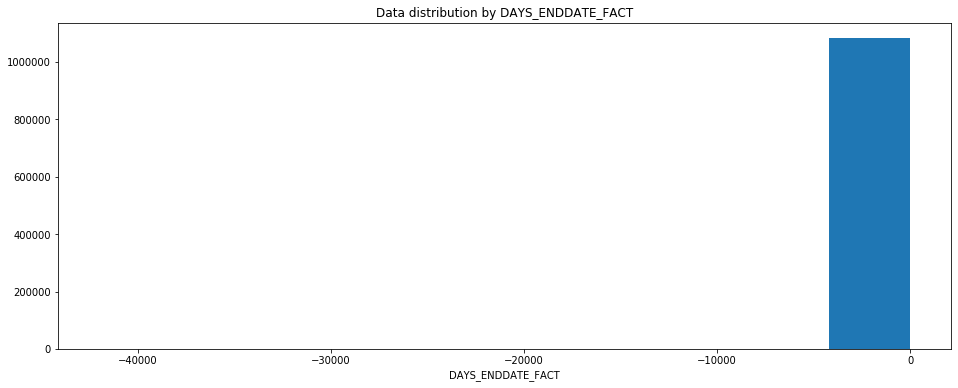

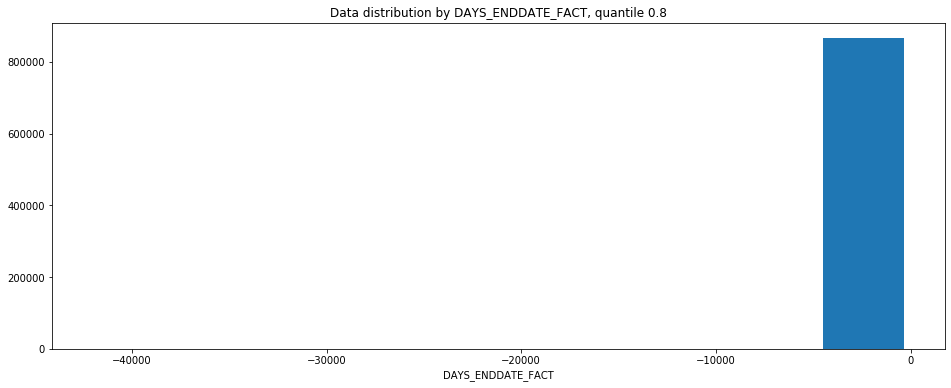

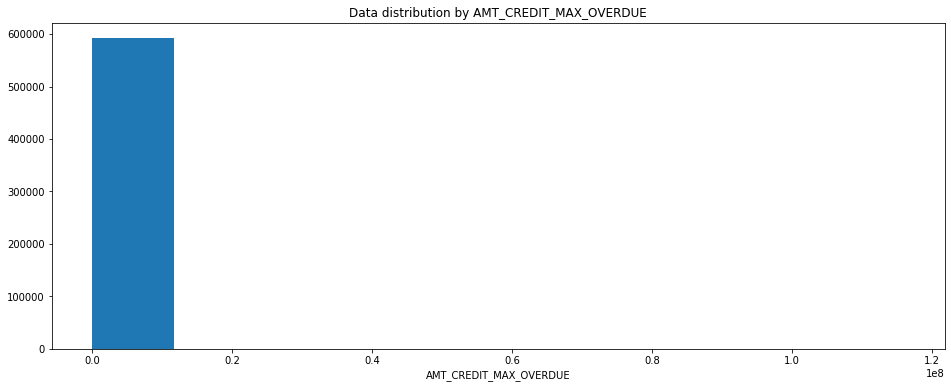

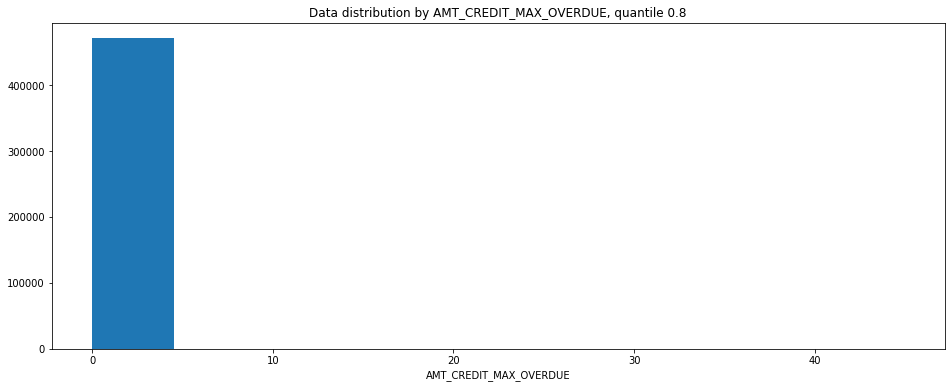

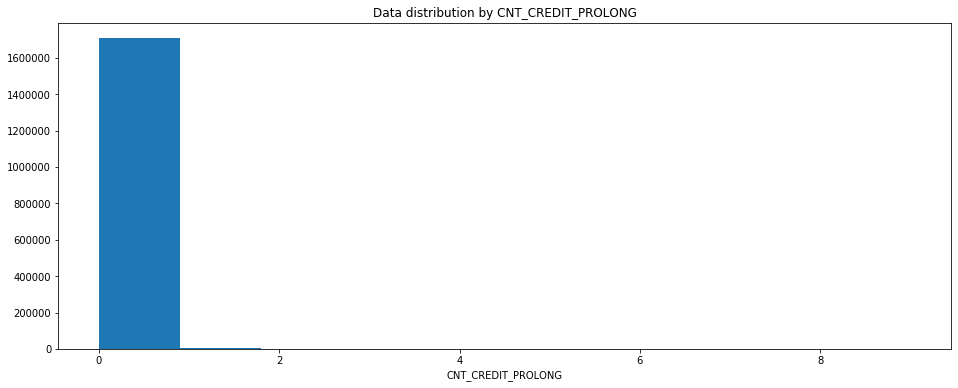

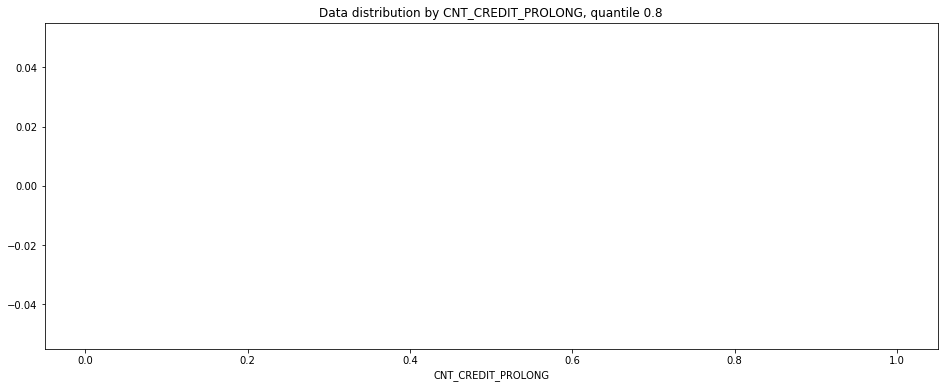

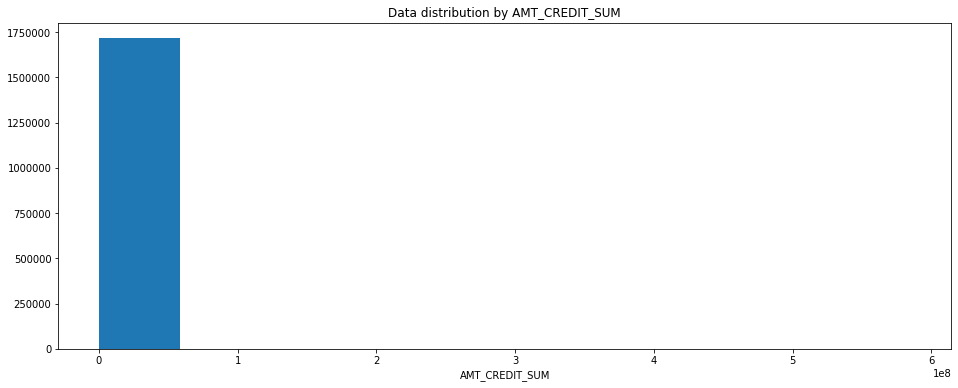

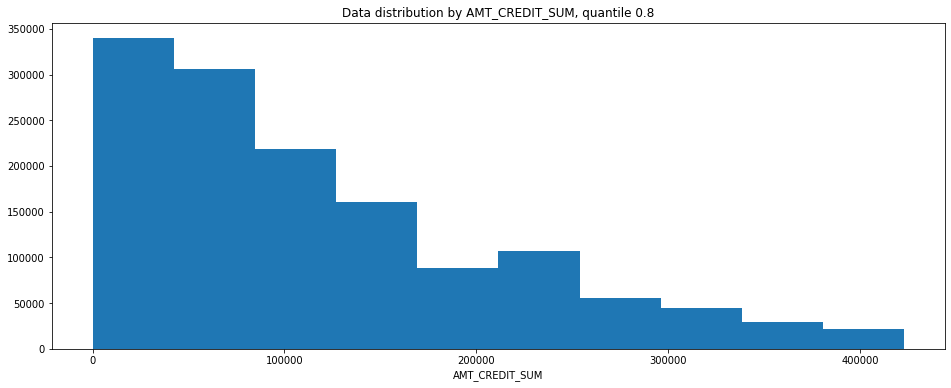

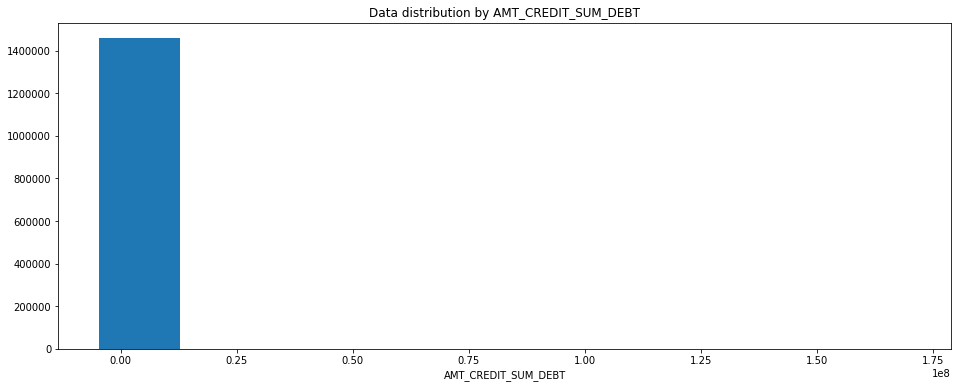

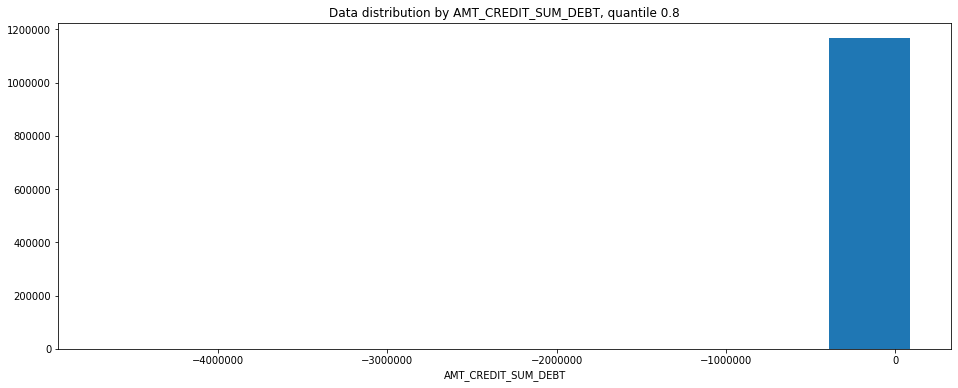

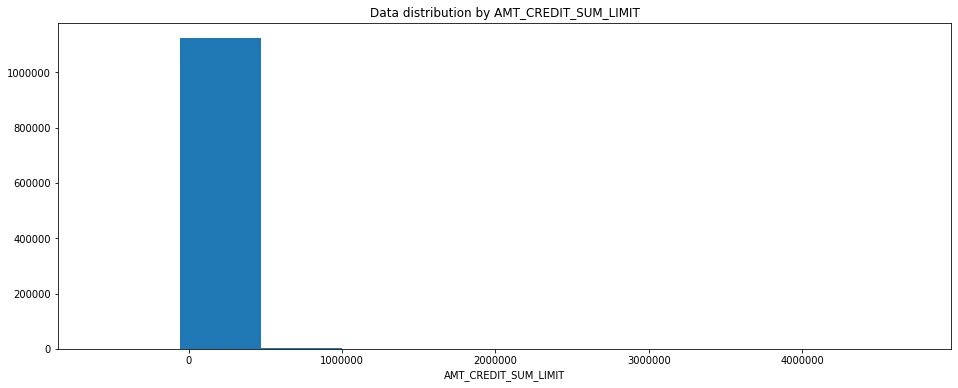

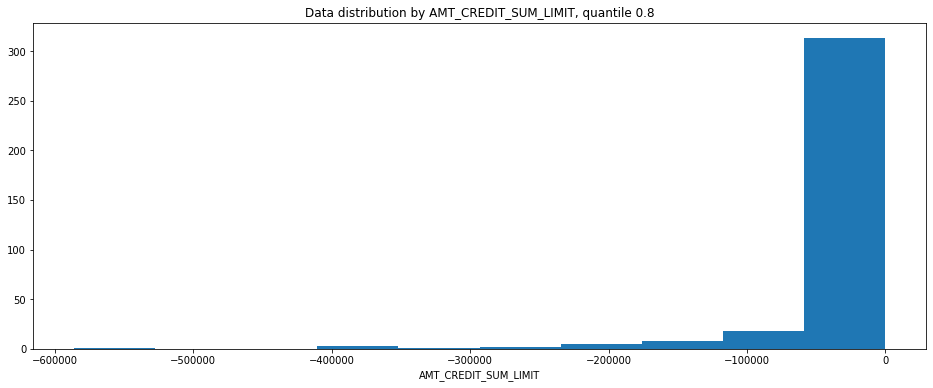

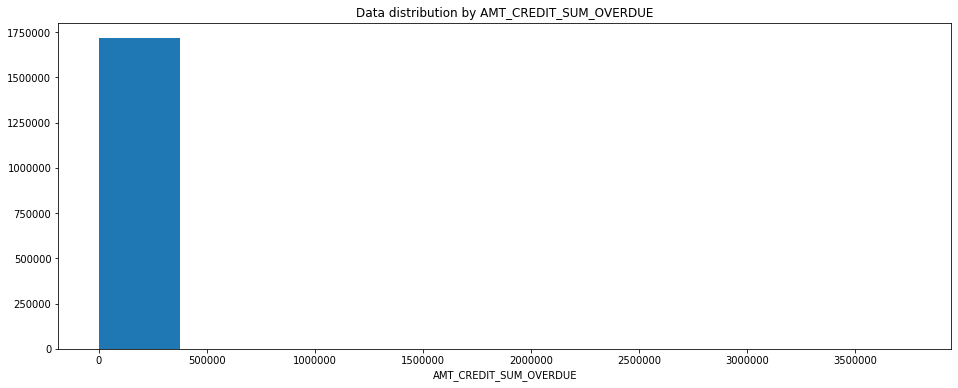

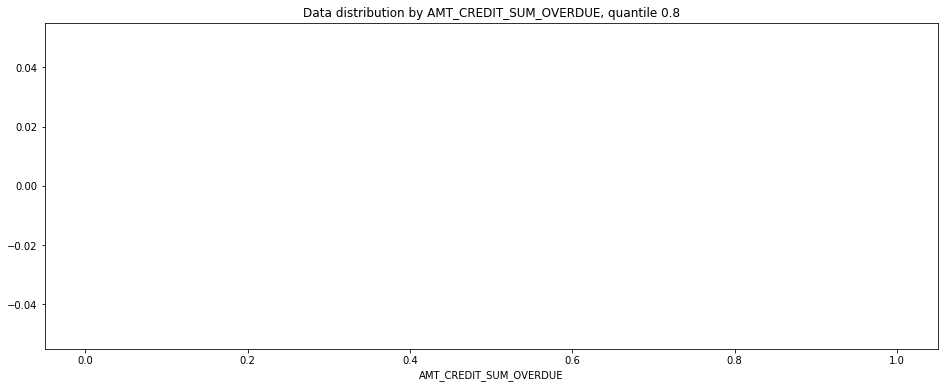

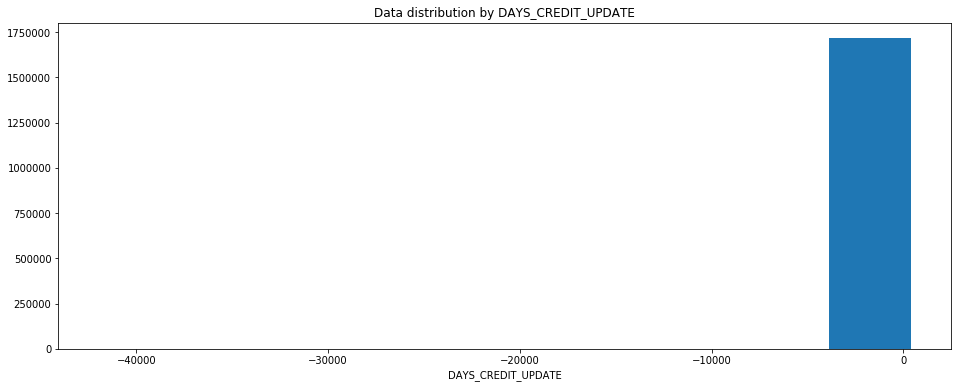

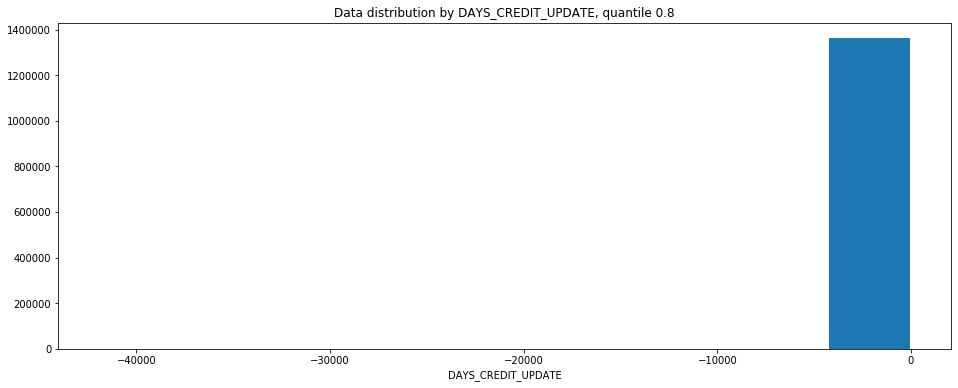

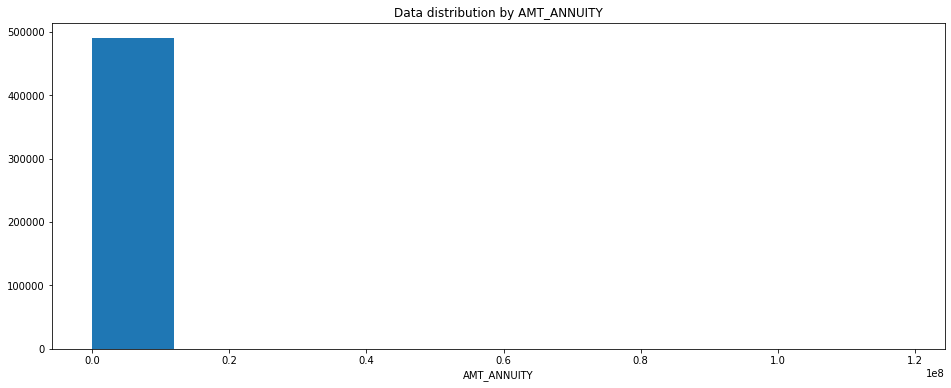

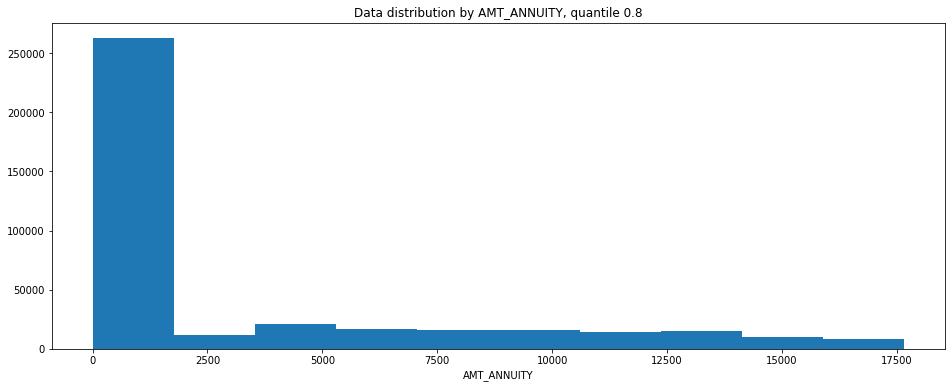

In [11]:
helpers.draw_hists_for_numerical_columns(BUREAU_NUMERIC_FEATURES, BUREAU, quantile=0.8, bins=10)

Колонки:

- CREDIT_ACTIVE - статус кредита: Осмысленные значения: Closed, Active
- CREDIT_DAY_OVERDUE - Количество дней, на которое задерживается выплата
- AMT_CREDIT_SUM - Полная сумма кредита
- AMT_CREDIT_SUM_DEBT - Сумма, которую осталось выплатить
- AMT_CREDIT_SUM_LIMIT - Сумма, которая была выплачена
- AMT_CREDIT_SUM_OVERDUE - Сумма, которая задерживается на данный момент
- CNT_CREDIT_PROLONG - Число раз, которое кредит был продлен
- AMT_ANNUITY - Ежегодные выплаты
- DAYS_CREDIT_UPDATE - Число дней, прошедшее с последнего обновления
- DAYS_ENDDATE_FACT - Число дней, с момента закрытия кредита
- AMT_CREDIT_MAX_OVERDUE - Максимальная задолженность

### Подумаем, какие полезные данные мы можем извлечь из этой таблицы:

1. Количество предыдущих кредитов для каждого пользователя. - bureau_previous_credits_count
2. Различные статистики по числовым признакам: mean, median, sum, min, max, 
3. Количество активных кредитов. - bureau_previous_credits_active_count
4. Количество закрытых кредитов. - bureau_previous_credits_closed_count
5. Процент активных кредитов - bureau_previous_credits_active_rate
6. Процент кредитов, для которых прошла enddate (DAYS_CREDIT_ENDDATE < 0) - bureau_previous_credits_end_date_passed_rate
7. Процент продленных кредитов - bureau_previous_credits_prolonged_rate

Добавим эти признаки

In [12]:
def add_bureau_features(df, bureau):
    bureau_features = []
    # bureau___previous_credits_count
    bureau_features.append('bureau___previous_credits_count')
    bureau_previous_credits_count = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
        columns = {'SK_ID_BUREAU': 'bureau___previous_credits_count'})
    df = df.merge(bureau_previous_credits_count, on='SK_ID_CURR', how='left')
    df['bureau___previous_credits_count'] = df['bureau___previous_credits_count'].fillna(0)
    # bureau___previous_credits_active_count
    bureau_features.append('bureau___previous_credits_active_count')
    bureau_previous_credits_active_count = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
        columns = {'SK_ID_BUREAU': 'bureau___previous_credits_active_count'})
    df = df.merge(bureau_previous_credits_active_count, on='SK_ID_CURR', how='left')
    df['bureau___previous_credits_active_count'] = df['bureau___previous_credits_active_count'].fillna(0)
    # bureau___previous_credits_closed_count
    bureau_features.append('bureau___previous_credits_closed_count')
    bureau_previous_credits_closed_count = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
        columns = {'SK_ID_BUREAU': 'bureau___previous_credits_closed_count'})
    df = df.merge(bureau_previous_credits_closed_count, on='SK_ID_CURR', how='left')
    df['bureau___previous_credits_closed_count'] = df['bureau___previous_credits_closed_count'].fillna(0)
    # bureau___previous_credits_active_rate
    bureau_features.append('bureau___previous_credits_active_rate')
    df['bureau___previous_credits_active_rate'] = df['bureau___previous_credits_active_count'] / df['bureau___previous_credits_count']
    # numerical statistics
    new_cols = []
    bureau_numerical_stats = bureau[BUREAU_NUMERIC_FEATURES].groupby('SK_ID_CURR', as_index = False).agg(['median', 'mean', 'max', 'min', 'sum']).reset_index()
    for feature in bureau_numerical_stats.columns.levels[0]:
        if feature == 'SK_ID_CURR':
            continue
        for stat in bureau_numerical_stats.columns.levels[1][:-1]:
            new_cols.append('bureau___{}_{}'.format(feature, stat))
    bureau_numerical_stats.columns = ['SK_ID_CURR'] + new_cols
    bureau_features = bureau_features + new_cols
    df = df.merge(bureau_numerical_stats, on='SK_ID_CURR', how='left')
    # bureau___end_date_passed_credits_rate
    bureau_features.append('bureau___end_date_passed_credits_rate')
    end_date_passed_credits_count = bureau[bureau['DAYS_CREDIT_ENDDATE'] < 0].groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
        columns = {'SK_ID_BUREAU': 'bureau___end_date_passed_credits_count'})
    df = df.merge(end_date_passed_credits_count, on='SK_ID_CURR', how='left')
    df['bureau___end_date_passed_credits_count'] = df['bureau___end_date_passed_credits_count'].fillna(0)
    df['bureau___end_date_passed_credits_rate'] = df['bureau___end_date_passed_credits_count'] / df['bureau___previous_credits_count']
    return df, bureau_features
    
    
    

In [13]:
application = pd.read_csv('data/application_train.csv')
application, BUREAU_FEATURES = add_bureau_features(application, BUREAU)

In [14]:
len(BUREAU_FEATURES)

70

In [15]:
application[BUREAU_FEATURES].sample(10, random_state=1)

,bureau___previous_credits_count,bureau___previous_credits_active_count,bureau___previous_credits_closed_count,bureau___previous_credits_active_rate,bureau___SK_ID_BUREAU_median,bureau___SK_ID_BUREAU_mean,bureau___SK_ID_BUREAU_max,bureau___SK_ID_BUREAU_min,bureau___SK_ID_BUREAU_sum,bureau___DAYS_CREDIT_median,bureau___DAYS_CREDIT_mean,bureau___DAYS_CREDIT_max,bureau___DAYS_CREDIT_min,bureau___DAYS_CREDIT_sum,bureau___CREDIT_DAY_OVERDUE_median,bureau___CREDIT_DAY_OVERDUE_mean,bureau___CREDIT_DAY_OVERDUE_max,bureau___CREDIT_DAY_OVERDUE_min,bureau___CREDIT_DAY_OVERDUE_sum,bureau___DAYS_CREDIT_ENDDATE_median,bureau___DAYS_CREDIT_ENDDATE_mean,bureau___DAYS_CREDIT_ENDDATE_max,bureau___DAYS_CREDIT_ENDDATE_min,bureau___DAYS_CREDIT_ENDDATE_sum,bureau___DAYS_ENDDATE_FACT_median,bureau___DAYS_ENDDATE_FACT_mean,bureau___DAYS_ENDDATE_FACT_max,bureau___DAYS_ENDDATE_FACT_min,bureau___DAYS_ENDDATE_FACT_sum,bureau___AMT_CREDIT_MAX_OVERDUE_median,bureau___AMT_CREDIT_MAX_OVERDUE_mean,bureau___AMT_CREDIT_MAX_OVERDUE_max,bureau___AMT_CREDIT_MAX_OVERDUE_min,bureau___AMT_CREDIT_MAX_OVERDUE_sum,bureau___CNT_CREDIT_PROLONG_median,bureau___CNT_CREDIT_PROLONG_mean,bureau___CNT_CREDIT_PROLONG_max,bureau___CNT_CREDIT_PROLONG_min,bureau___CNT_CREDIT_PROLONG_sum,bureau___AMT_CREDIT_SUM_median,bureau___AMT_CREDIT_SUM_mean,bureau___AMT_CREDIT_SUM_max,bureau___AMT_CREDIT_SUM_min,bureau___AMT_CREDIT_SUM_sum,bureau___AMT_CREDIT_SUM_DEBT_median,bureau___AMT_CREDIT_SUM_DEBT_mean,bureau___AMT_CREDIT_SUM_DEBT_max,bureau___AMT_CREDIT_SUM_DEBT_min,bureau___AMT_CREDIT_SUM_DEBT_sum,bureau___AMT_CREDIT_SUM_LIMIT_median,bureau___AMT_CREDIT_SUM_LIMIT_mean,bureau___AMT_CREDIT_SUM_LIMIT_max,bureau___AMT_CREDIT_SUM_LIMIT_min,bureau___AMT_CREDIT_SUM_LIMIT_sum,bureau___AMT_CREDIT_SUM_OVERDUE_median,bureau___AMT_CREDIT_SUM_OVERDUE_mean,bureau___AMT_CREDIT_SUM_OVERDUE_max,bureau___AMT_CREDIT_SUM_OVERDUE_min,bureau___AMT_CREDIT_SUM_OVERDUE_sum,bureau___DAYS_CREDIT_UPDATE_median,bureau___DAYS_CREDIT_UPDATE_mean,bureau___DAYS_CREDIT_UPDATE_max,bureau___DAYS_CREDIT_UPDATE_min,bureau___DAYS_CREDIT_UPDATE_sum,bureau___AMT_ANNUITY_median,bureau___AMT_ANNUITY_mean,bureau___AMT_ANNUITY_max,bureau___AMT_ANNUITY_min,bureau___AMT_ANNUITY_sum,bureau___end_date_passed_credits_rate
64282,7.0,2.0,2.0,0.285714,6577437.0,6577437.000,6577440.0,6577434.0,46042059.0,-1026.0,-1062.285714,-903.0,-1316.0,-7436.0,0.0,0.0,0.0,0.0,0.0,-8.0,-282.333333,69.0,-950.0,-1694.0,-866.0,-752.000000,-189.0,-1181.0,-3760.0,0.0,2021.27625,8085.105,0.0,8085.105,0.0,0.0,0.0,0.0,0.0,346500.0,298198.285714,450000.000,29704.5,2087388.000,0.00,12519.936,62599.68,0.0,62599.68,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-492.0,-524.428571,-21.0,-1092.0,-3671.0,0.000,8223.000,24669.000,0.000,24669.000,0.428571
94645,1.0,1.0,1.0,1.000000,6391230.0,6391230.000,6391230.0,6391230.0,6391230.0,-1054.0,-1054.000000,-1054.0,-1054.0,-1054.0,0.0,0.0,0.0,0.0,0.0,2598.0,2598.000000,2598.0,2598.0,2598.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000,0.0,0.0,0.0,0.0,0.0,112500.0,112500.000000,112500.000,112500.0,112500.000,16632.00,16632.000,16632.00,16632.0,16632.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,-6.000000,-6.0,-6.0,-6.0,0.000,0.000,0.000,0.000,0.000,0.000000
306349,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258314,9.0,4.0,4.0,0.444444,5651867.0,5651867.000,5651871.0,5651863.0,50866803.0,-1307.0,-1047.444444,-238.0,-1521.0,-9427.0,0.0,0.0,0.0,0.0,0.0,22.0,4205.875000,31111.0,-1277.0,33647.0,-1000.0,-788.600000,-153.0,-1277.0,-3943.0,0.0,4774.50000,14323.500,0.0,14323.500,0.0,0.0,0.0,0.0,0.0,45000.0,281499.000000,1440000.000,0.0,2533491.000,0.00,1339.500,12055.50,0.0,12055.50,0.0,6428.571429,45000.0,0.0,45000.0,0.0,0.0,0.0,0.0,0.0,-192.0,-439.888889,-12.0,-1274.0,-3959.0,NaN,NaN,NaN,NaN,0.000,

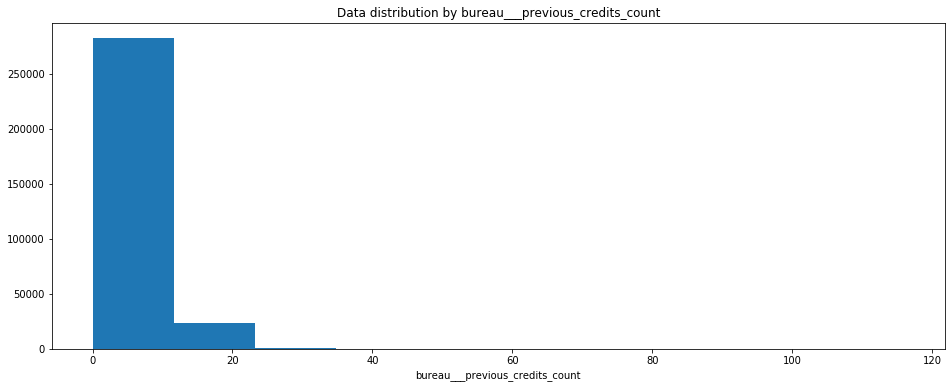

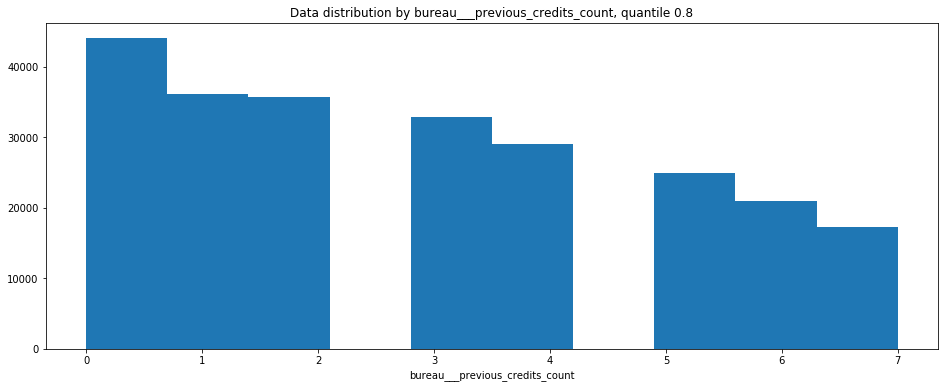

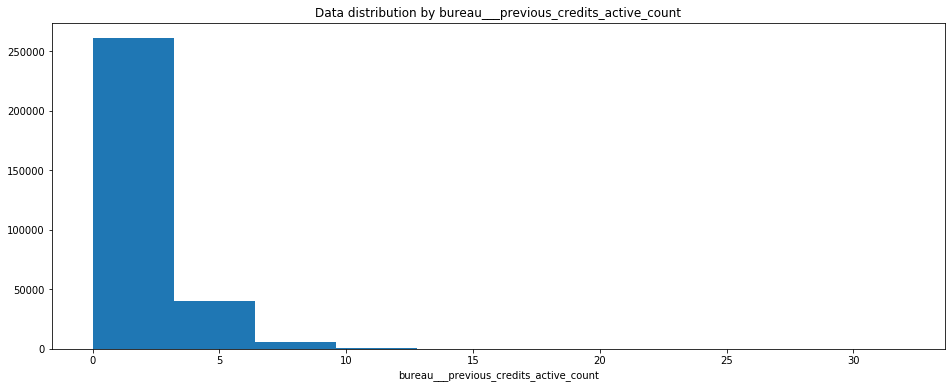

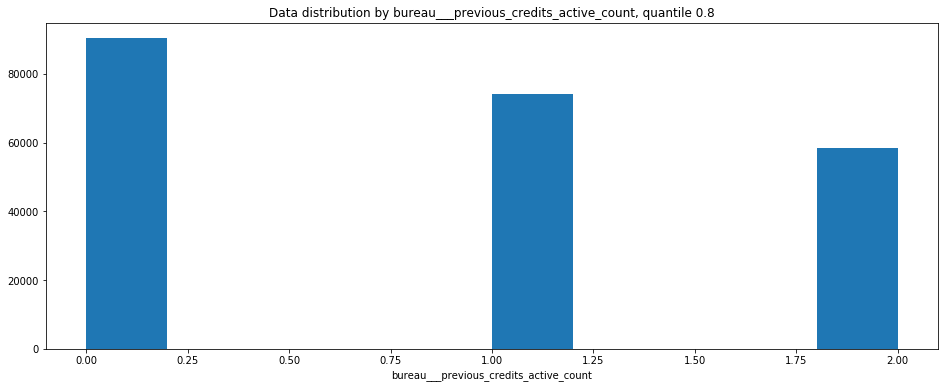

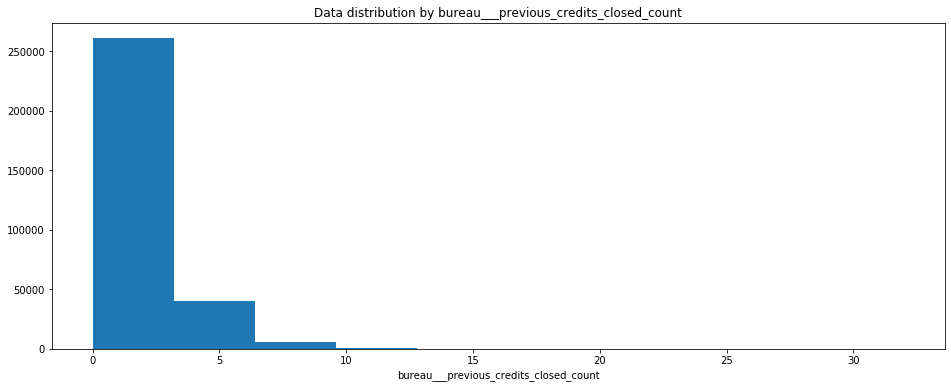

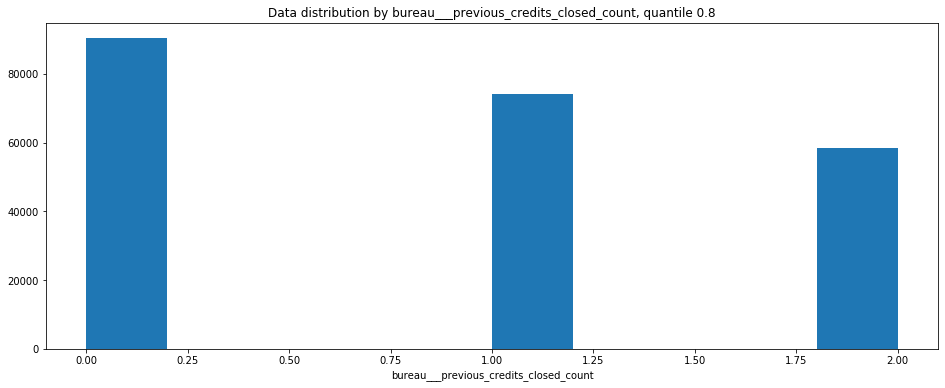

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


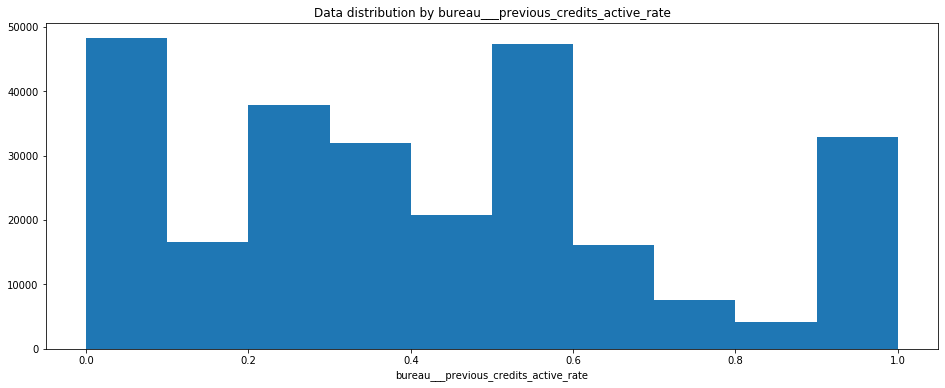

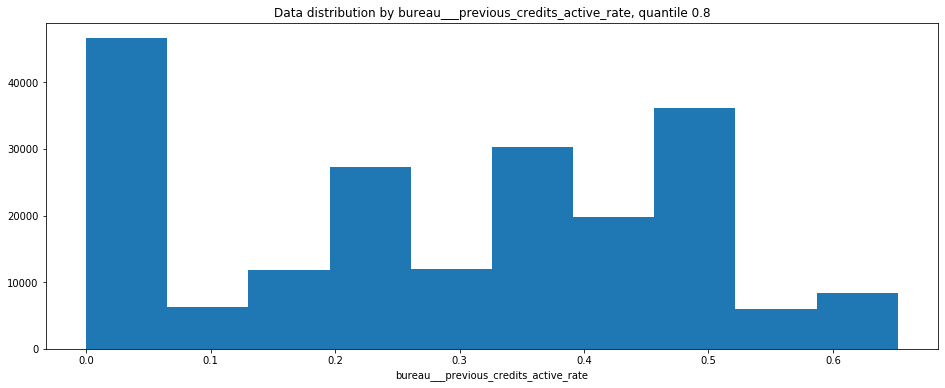

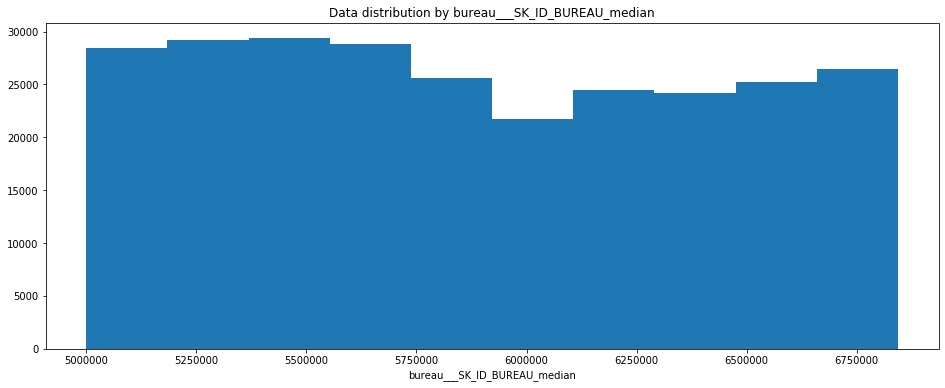

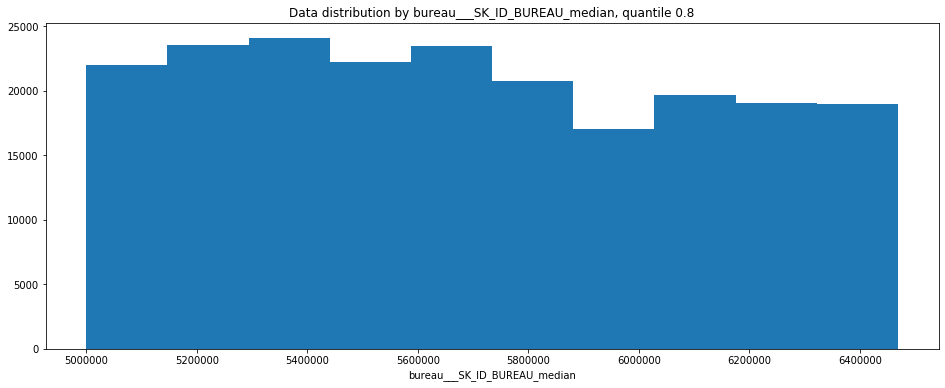

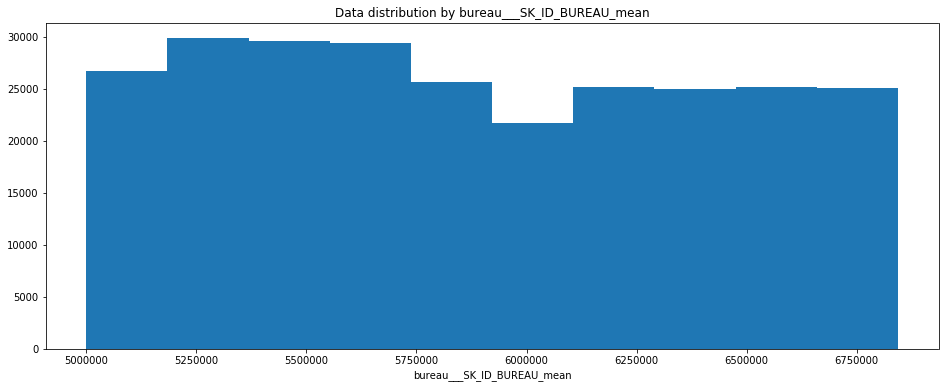

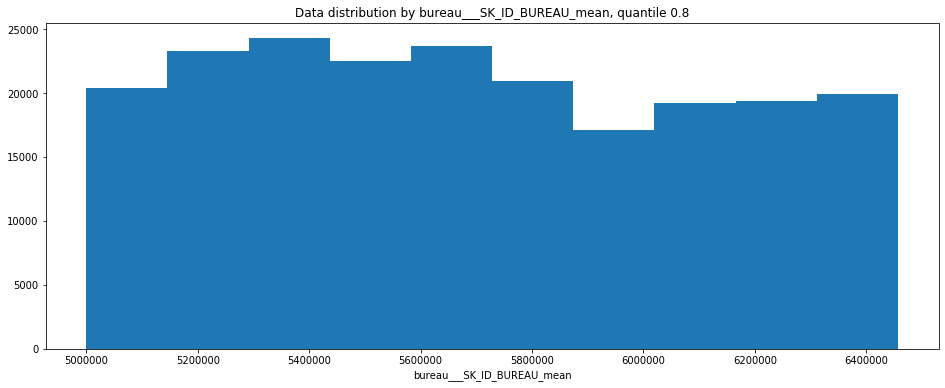

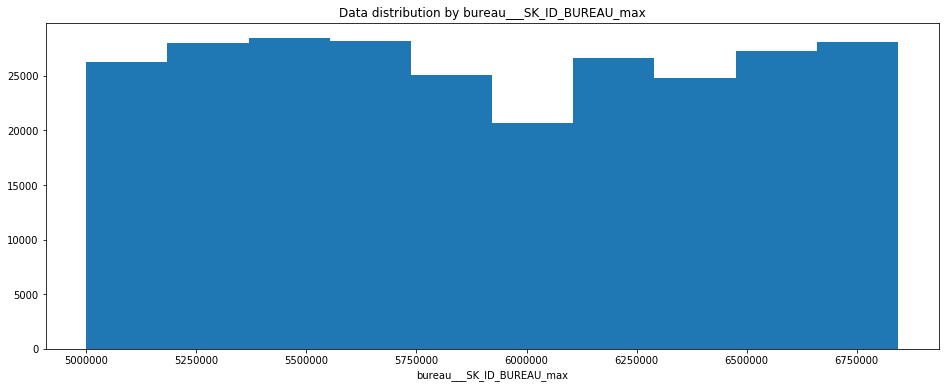

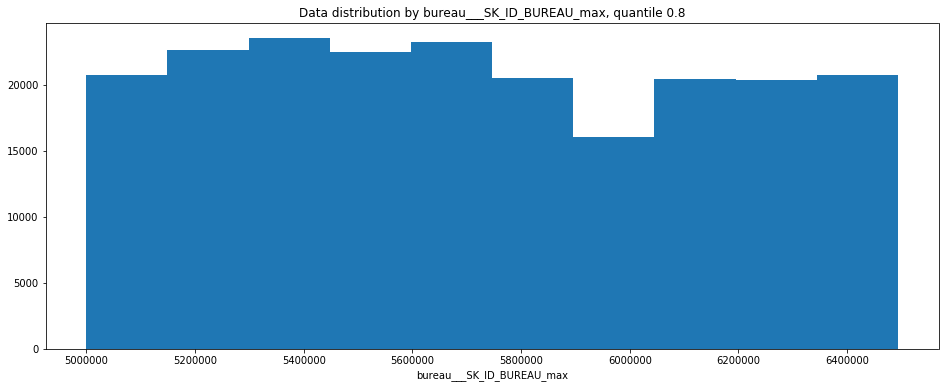

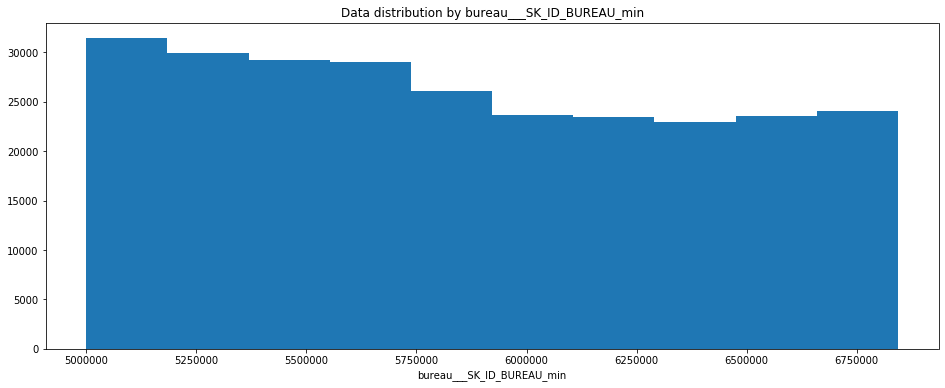

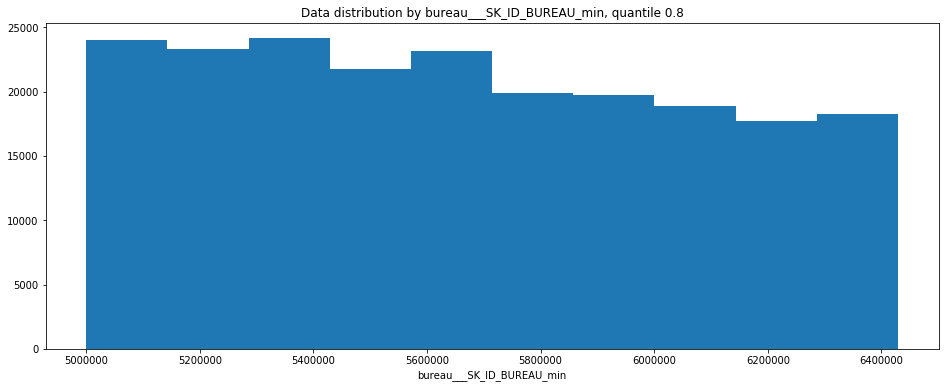

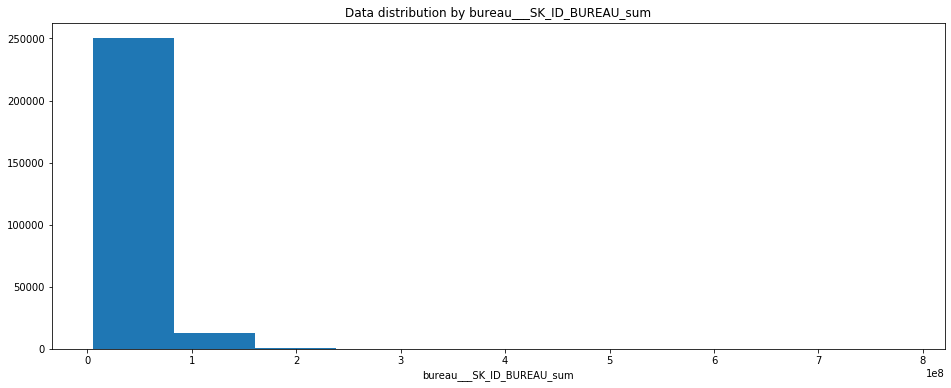

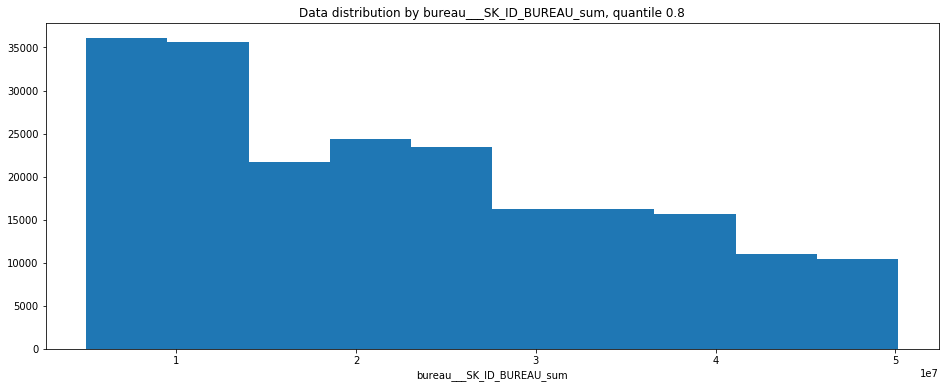

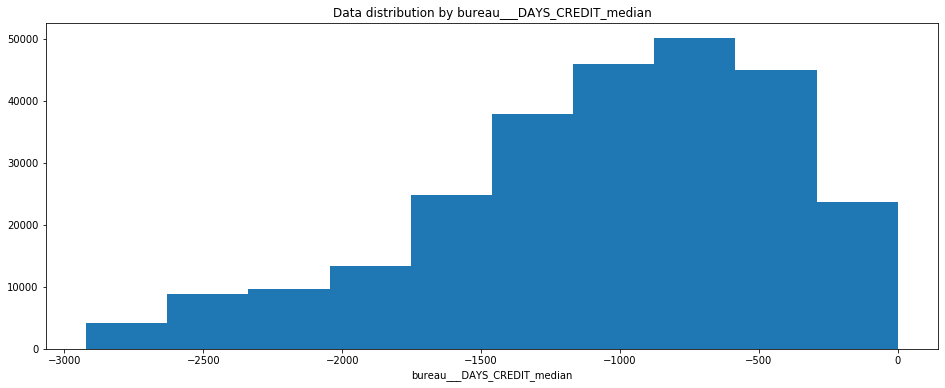

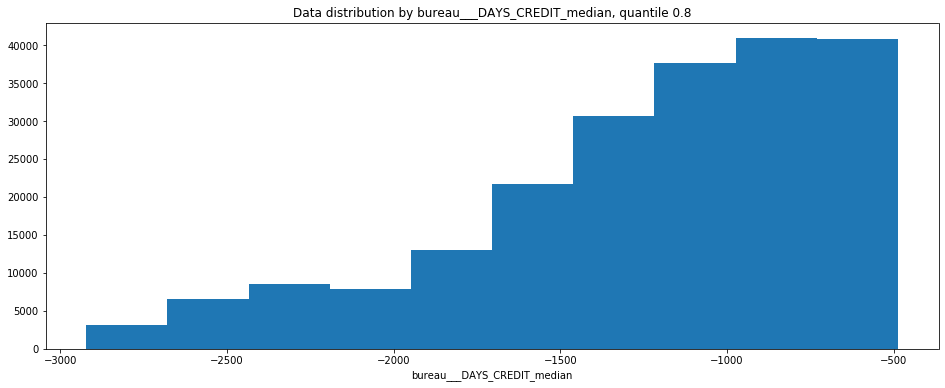

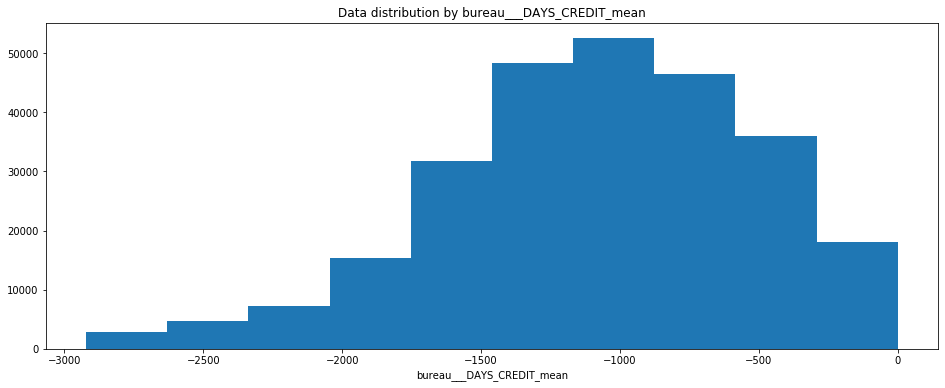

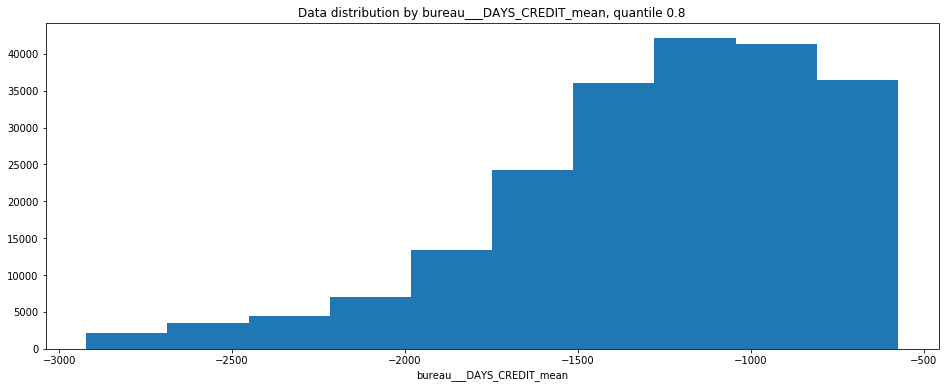

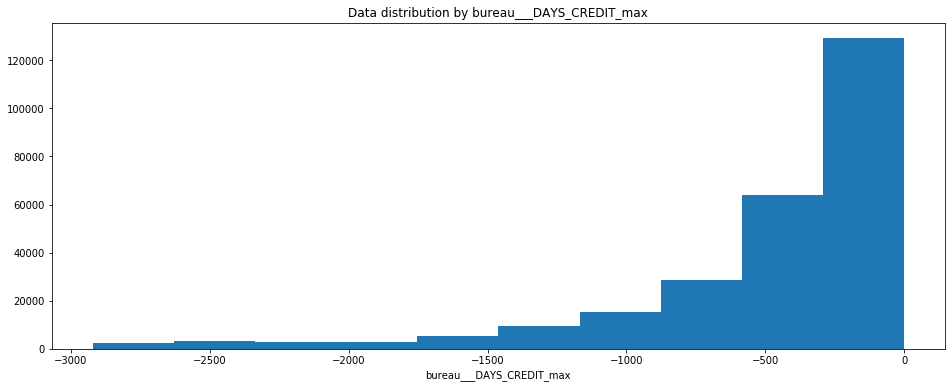

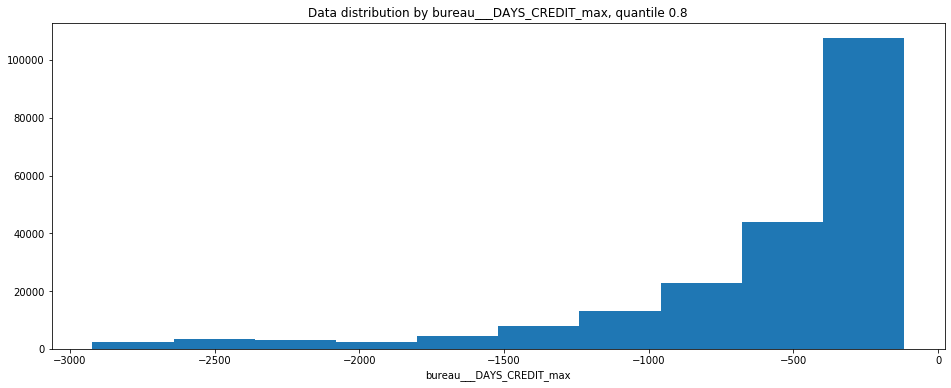

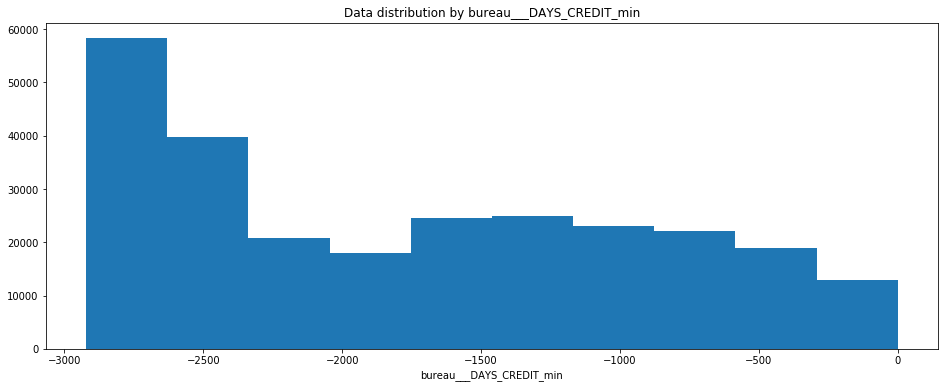

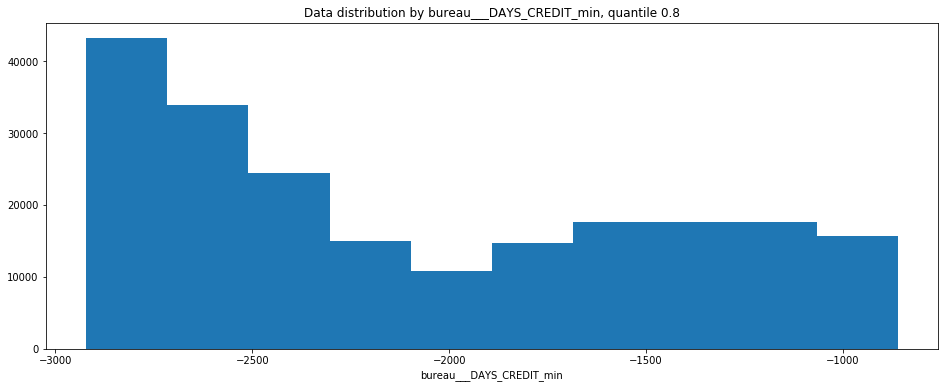

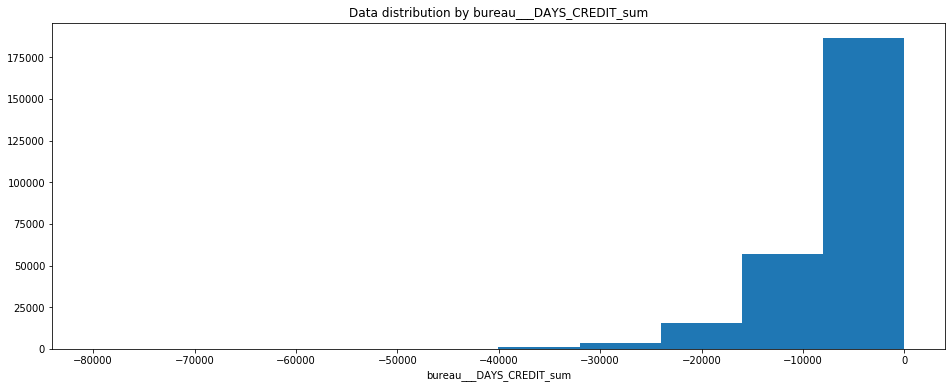

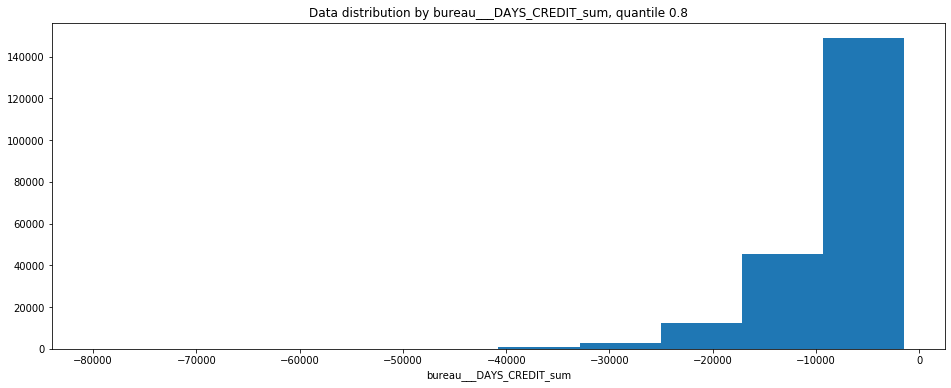

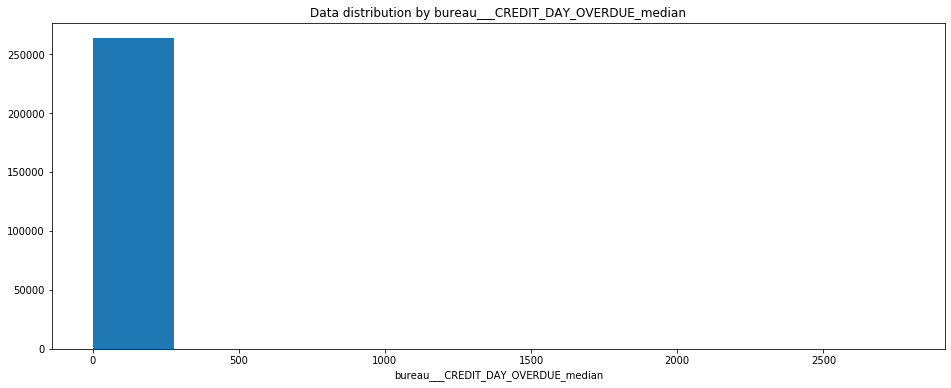

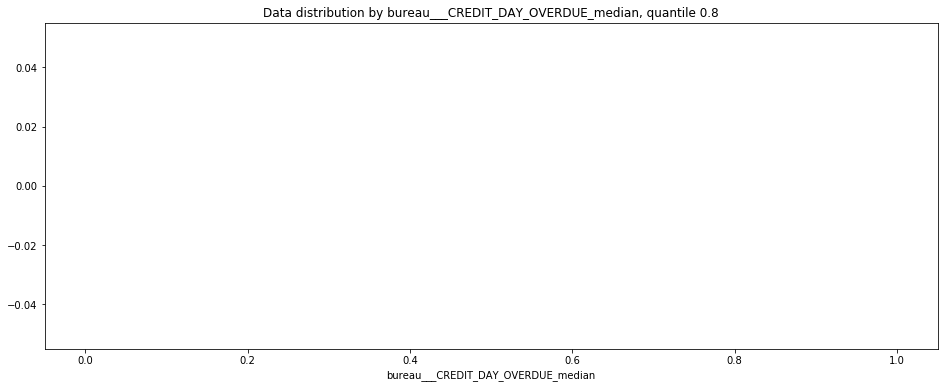

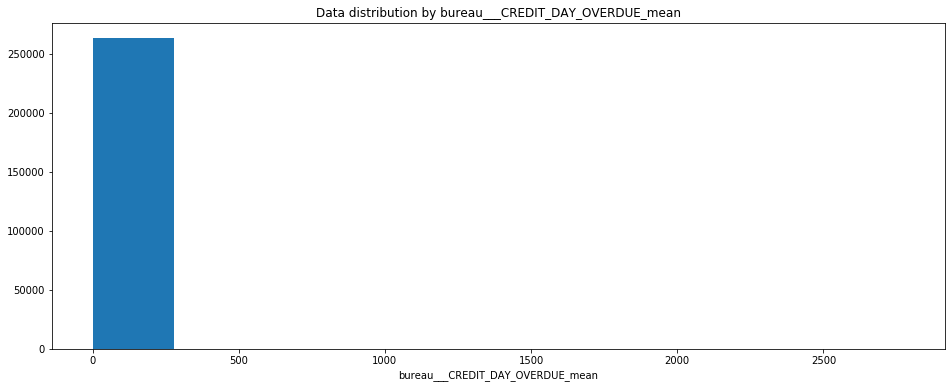

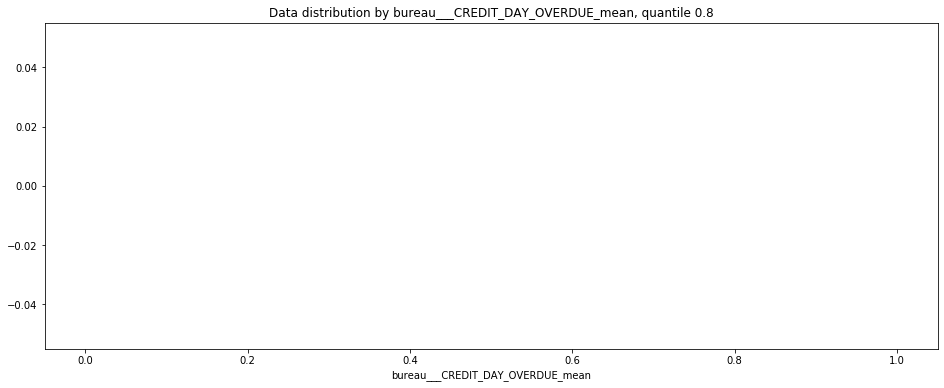

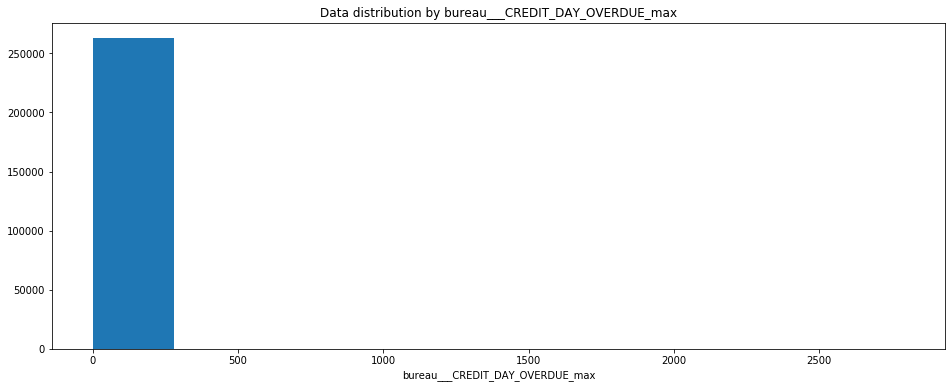

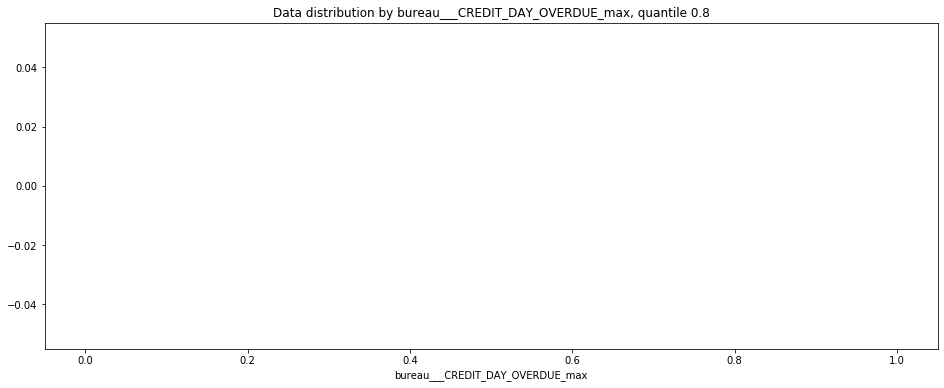

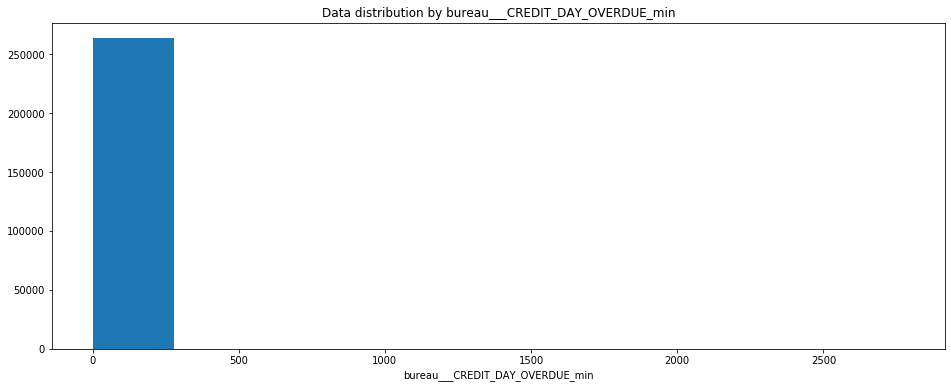

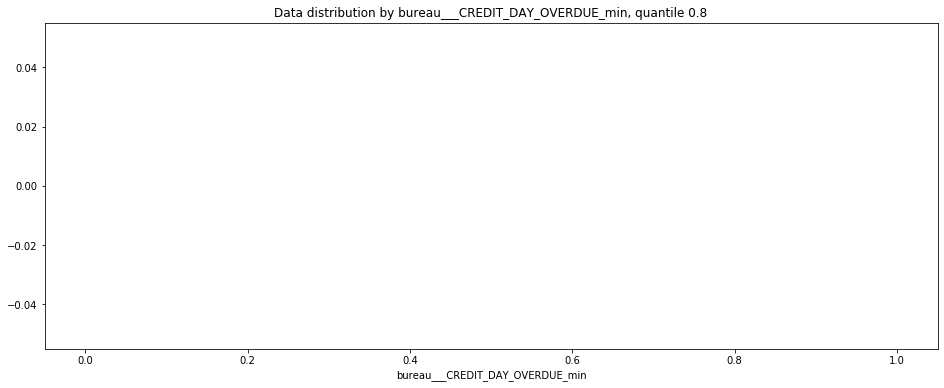

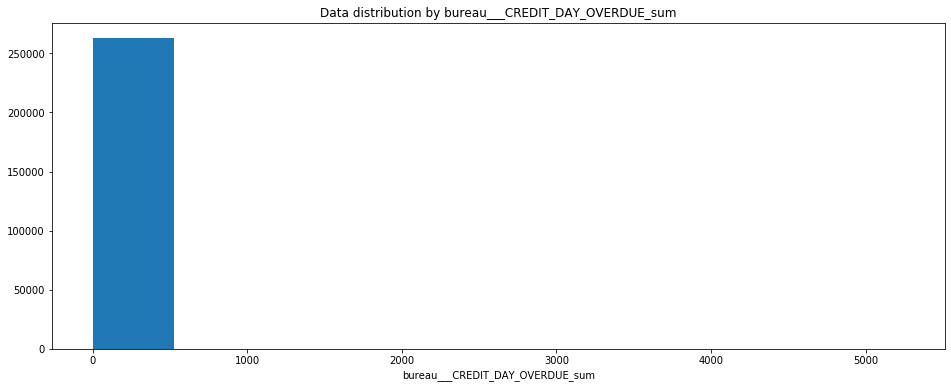

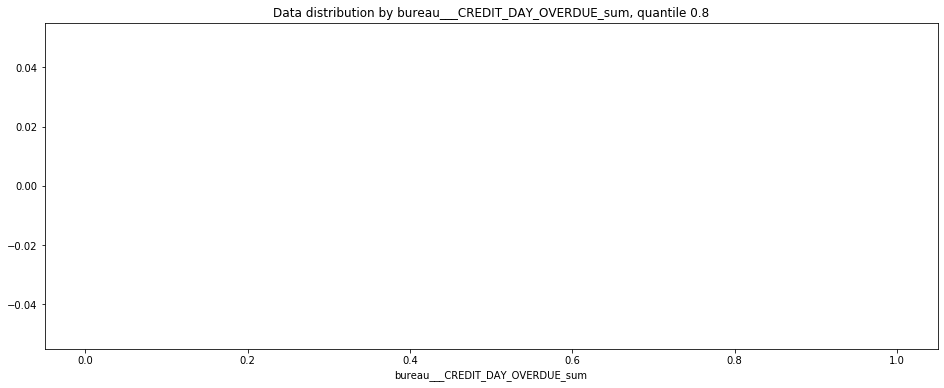

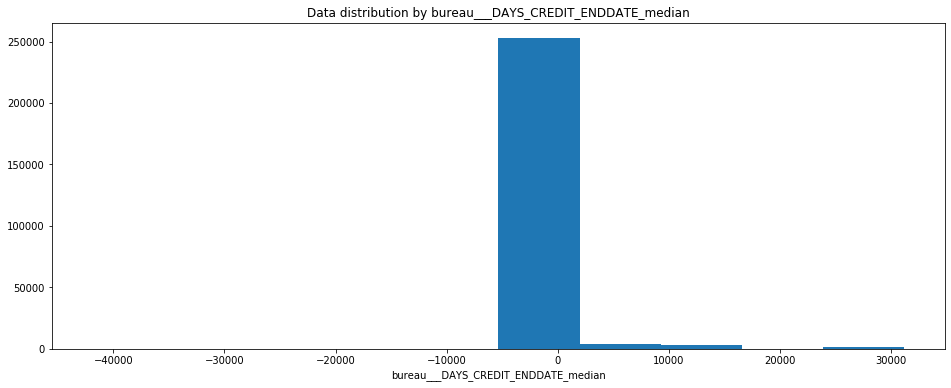

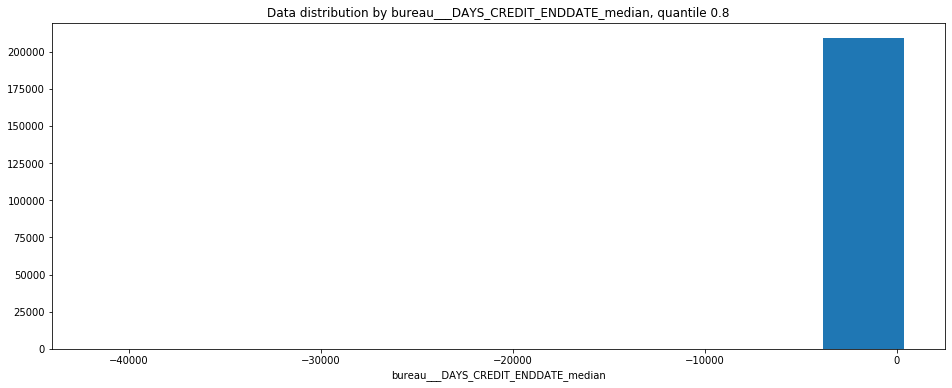

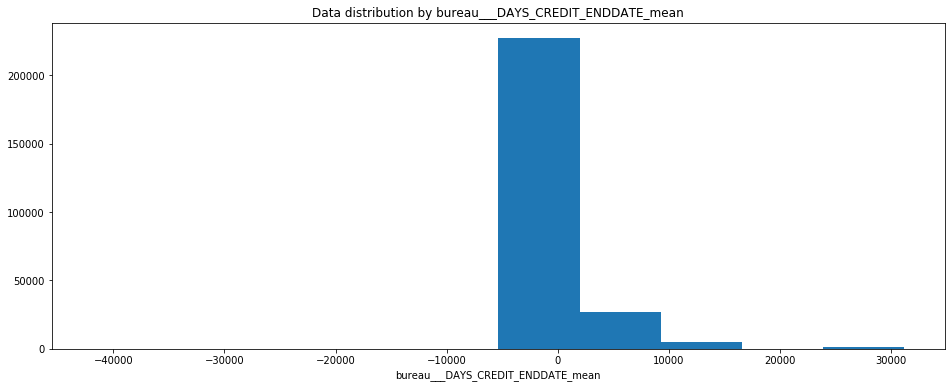

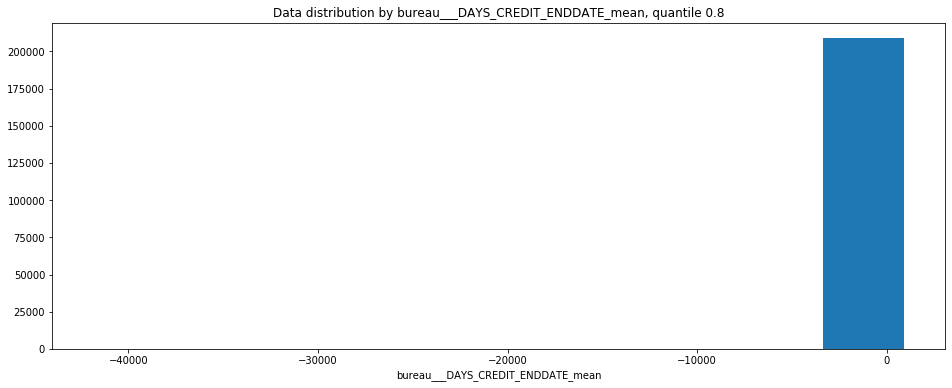

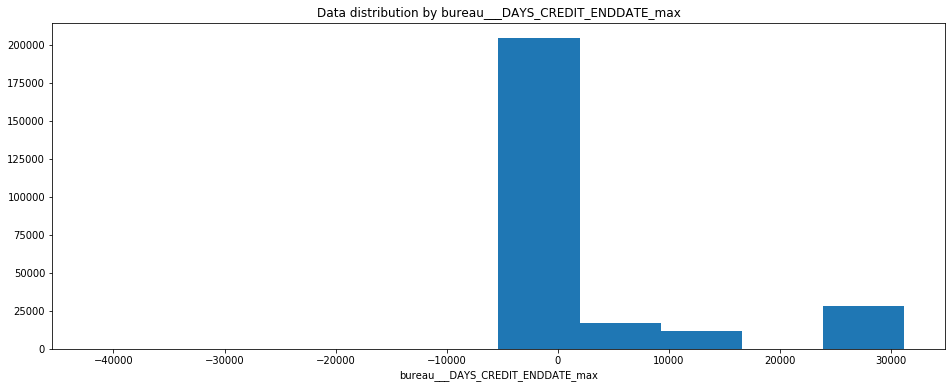

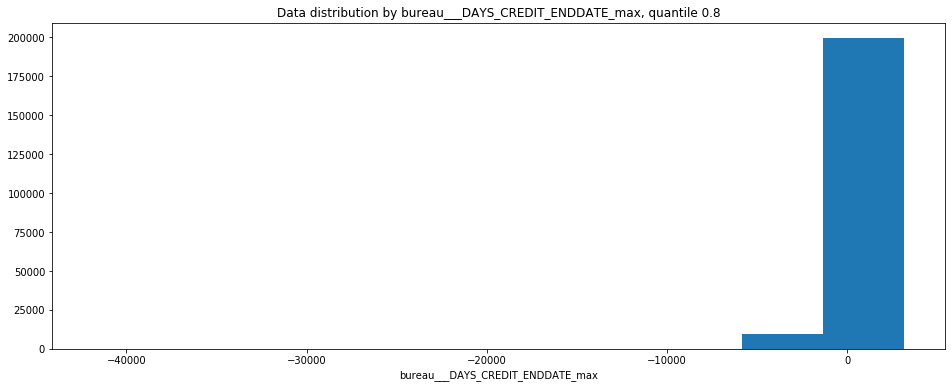

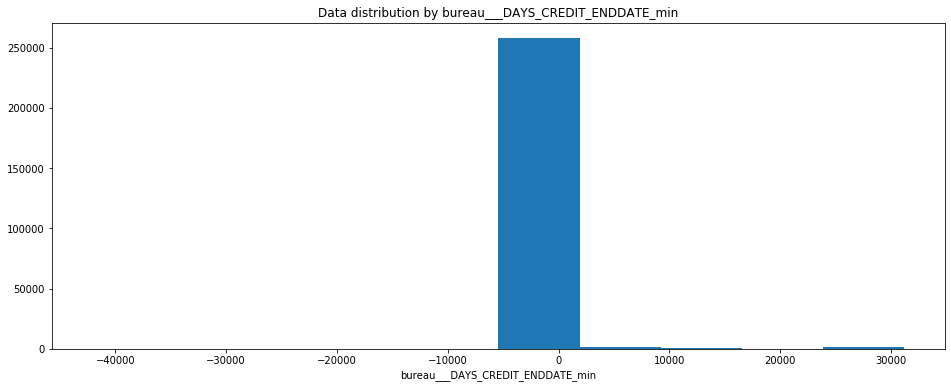

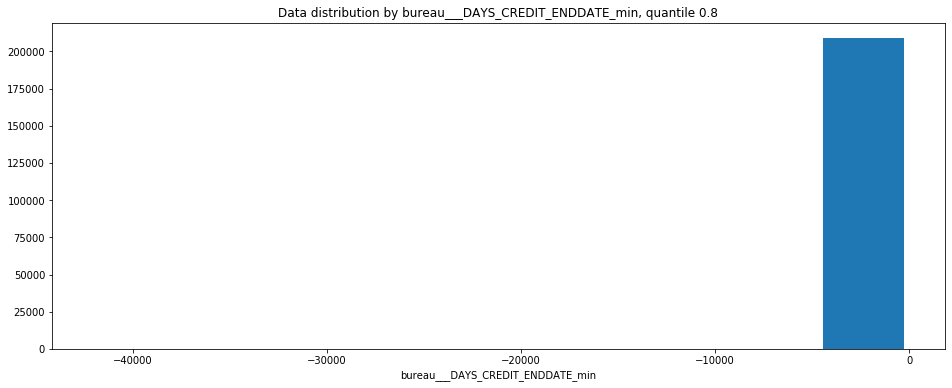

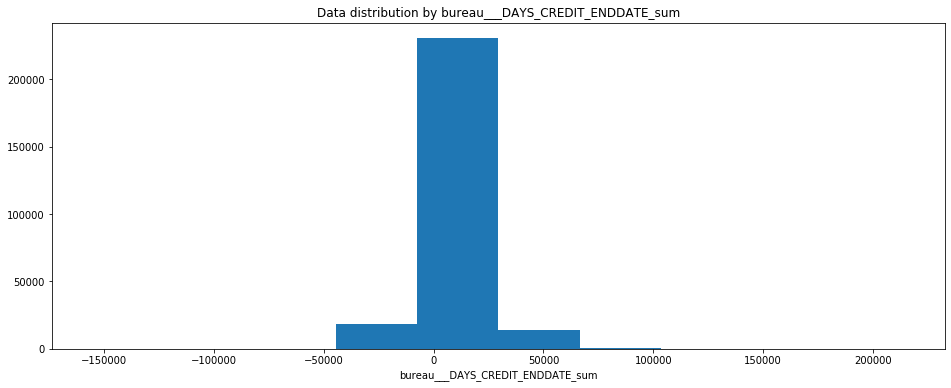

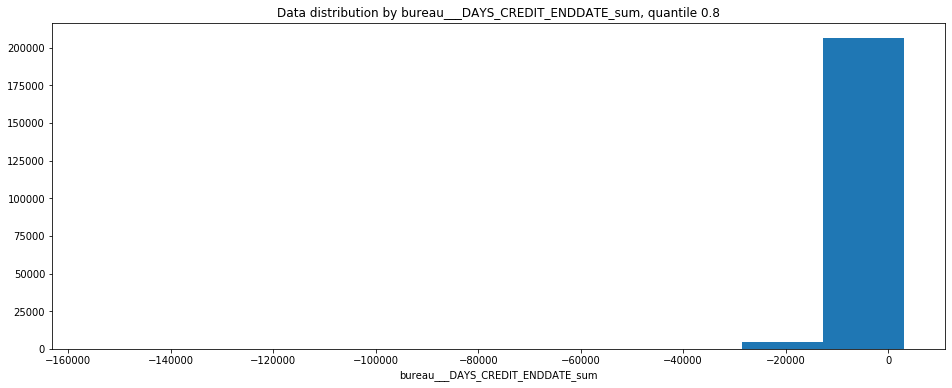

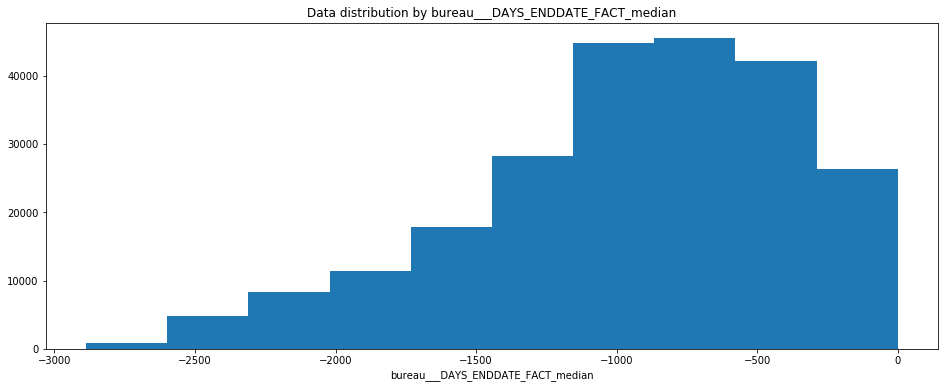

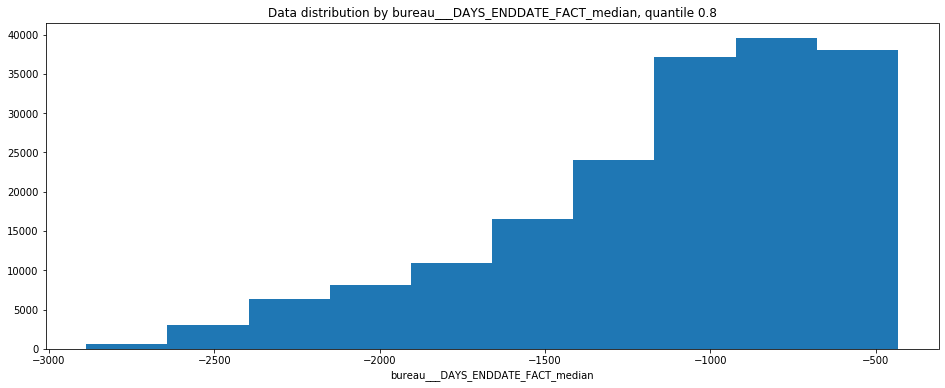

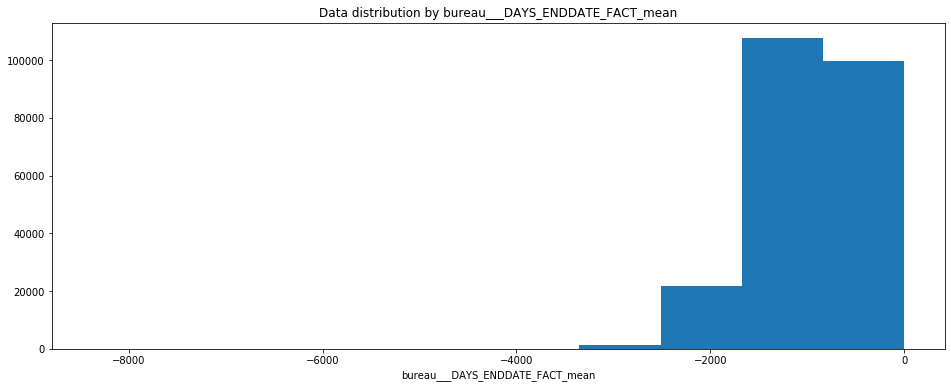

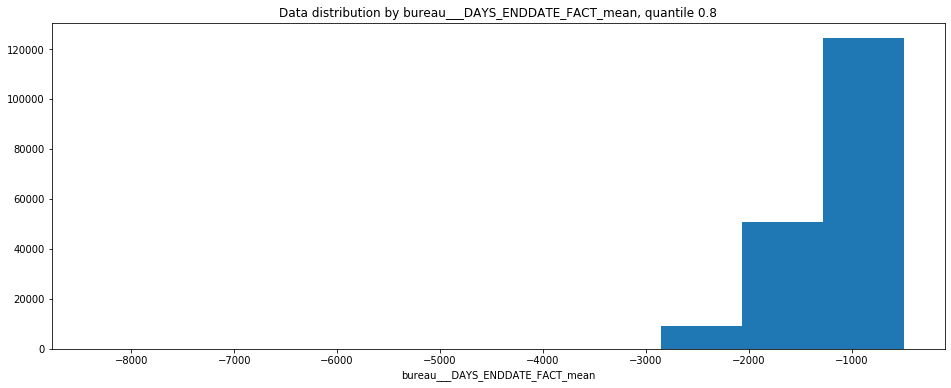

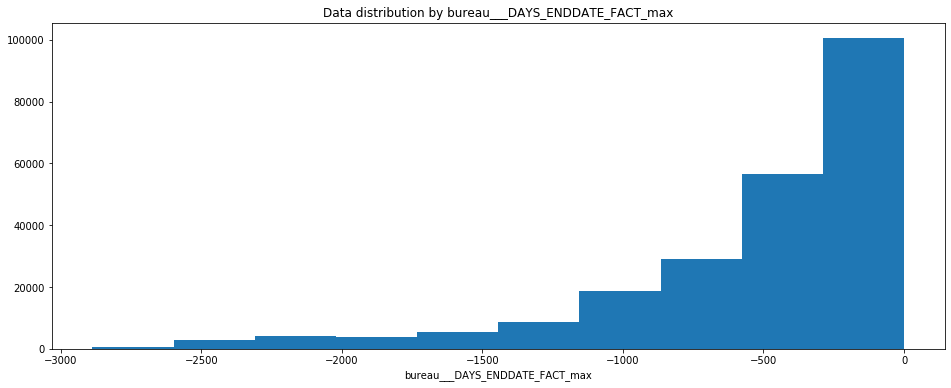

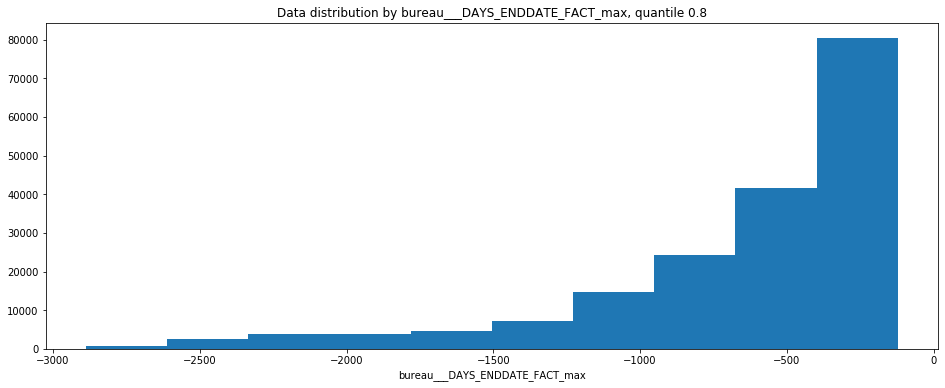

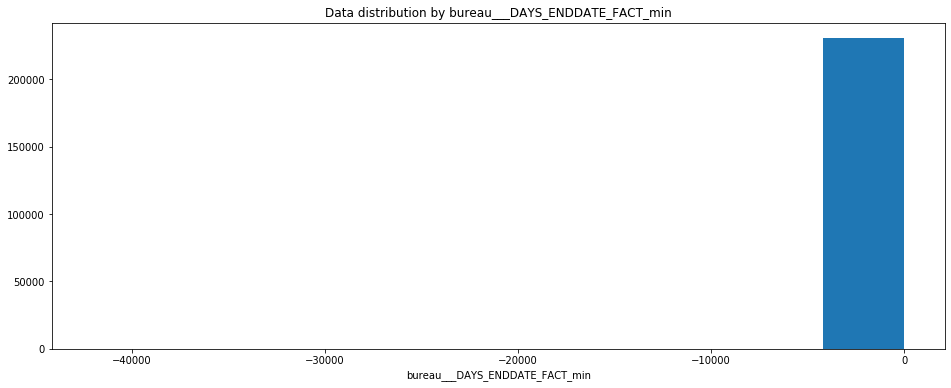

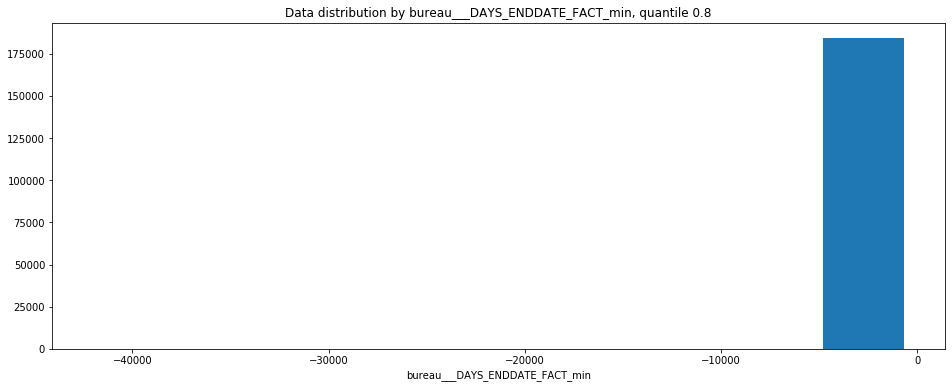

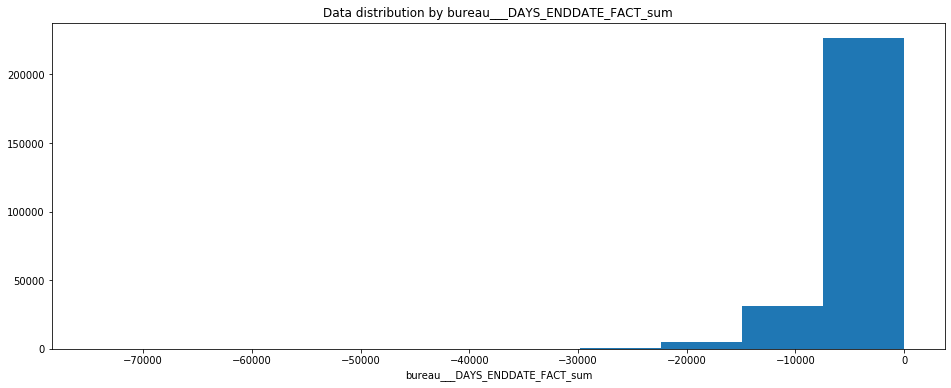

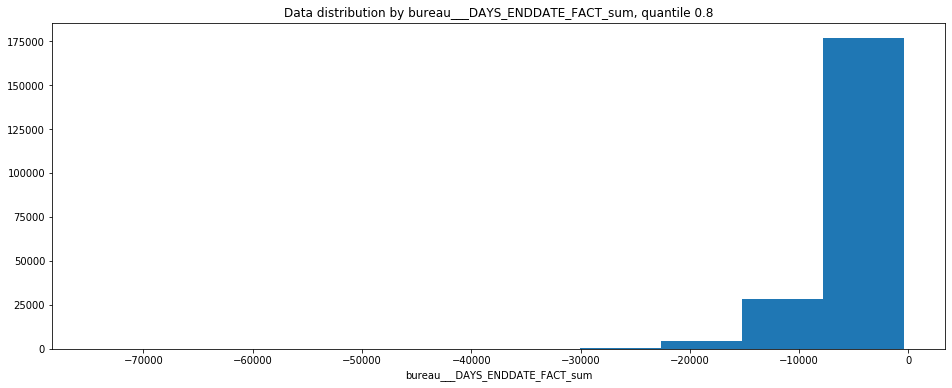

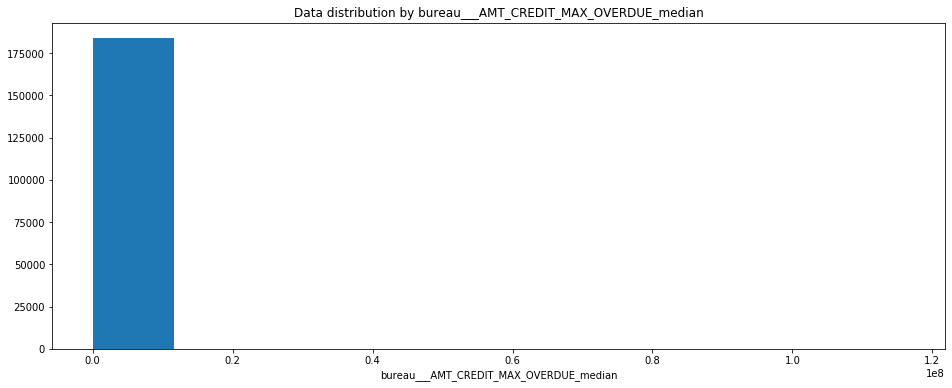

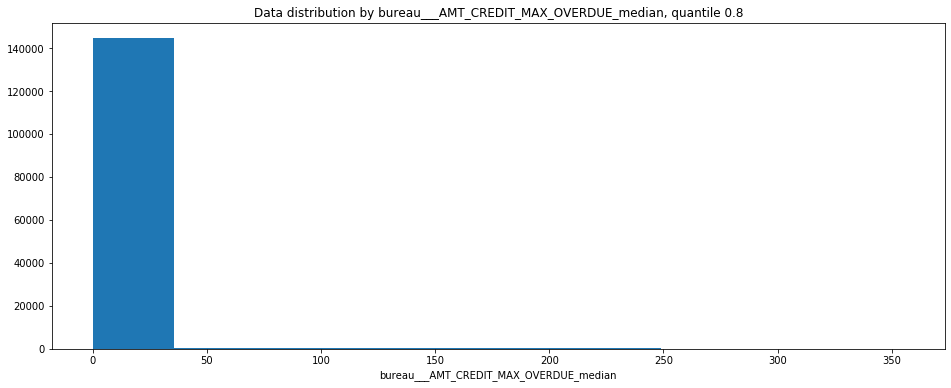

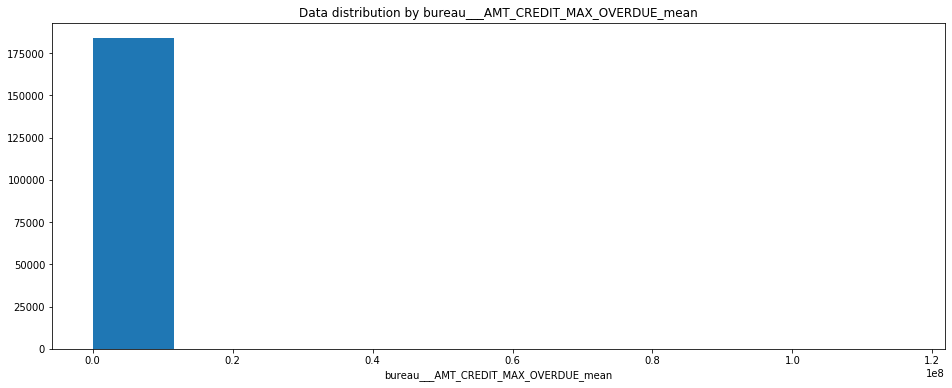

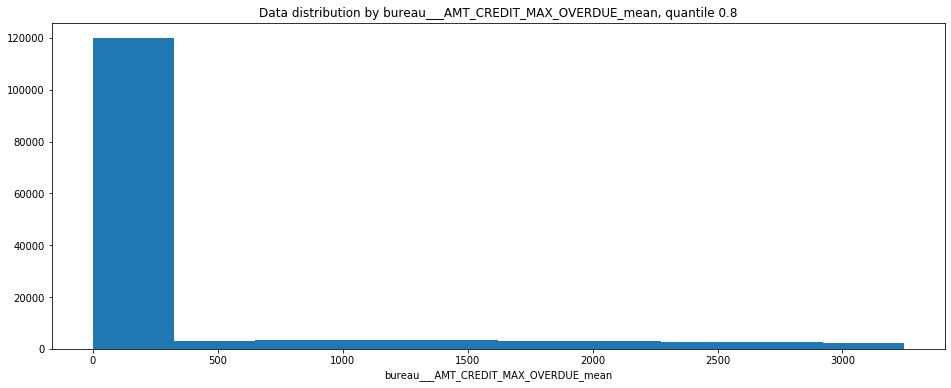

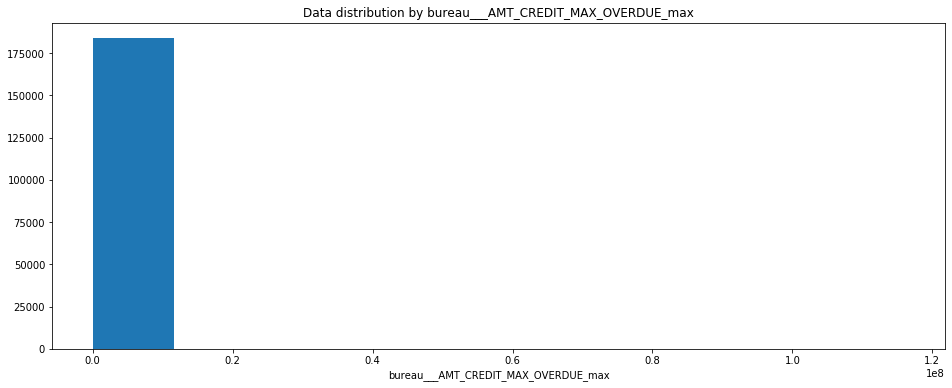

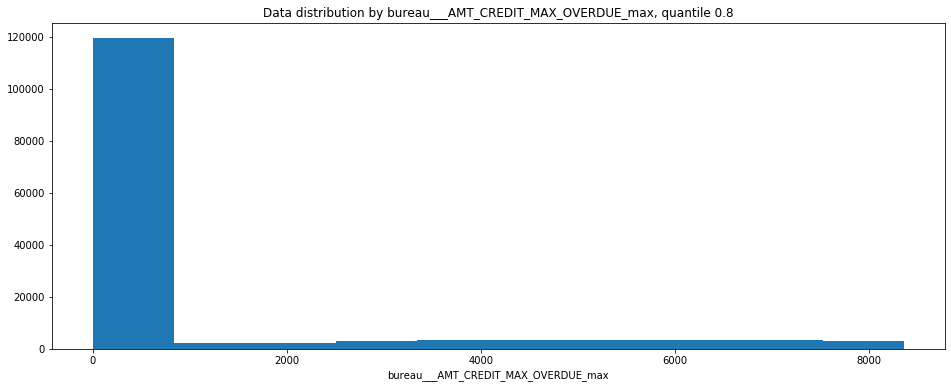

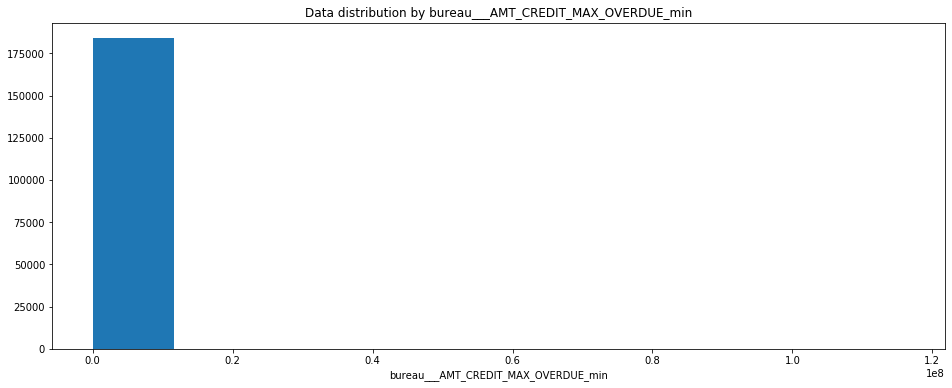

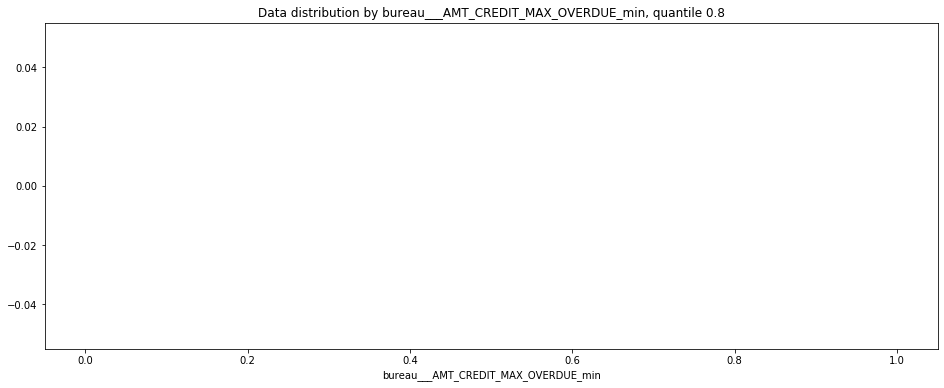

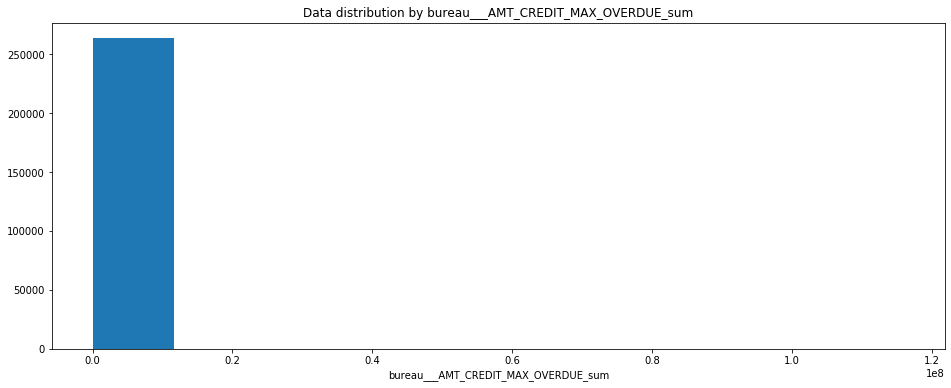

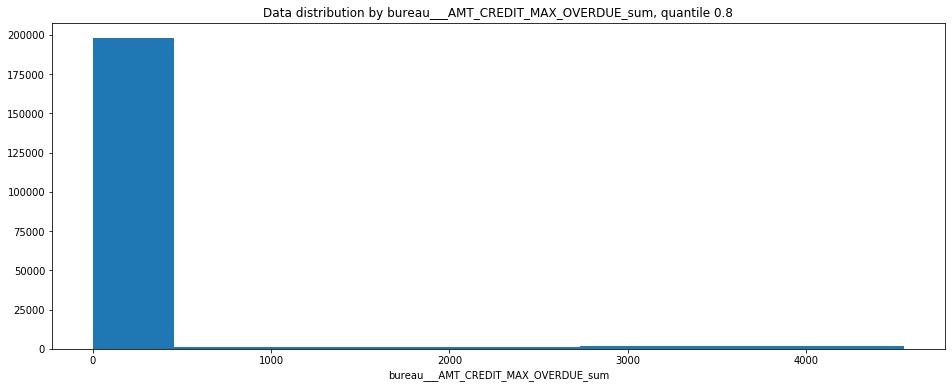

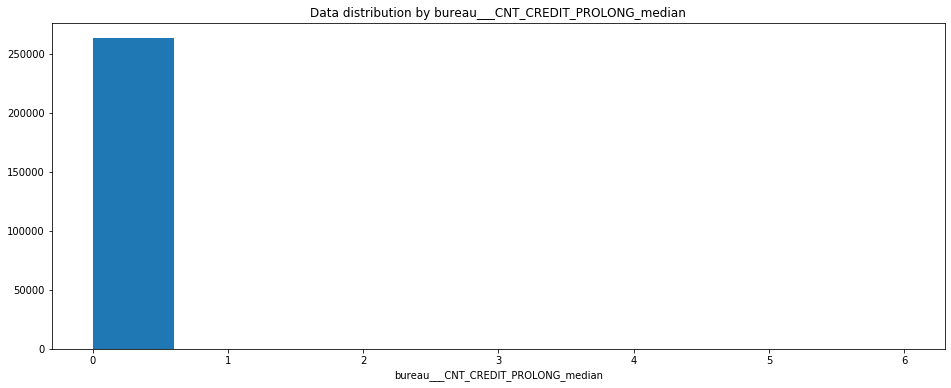

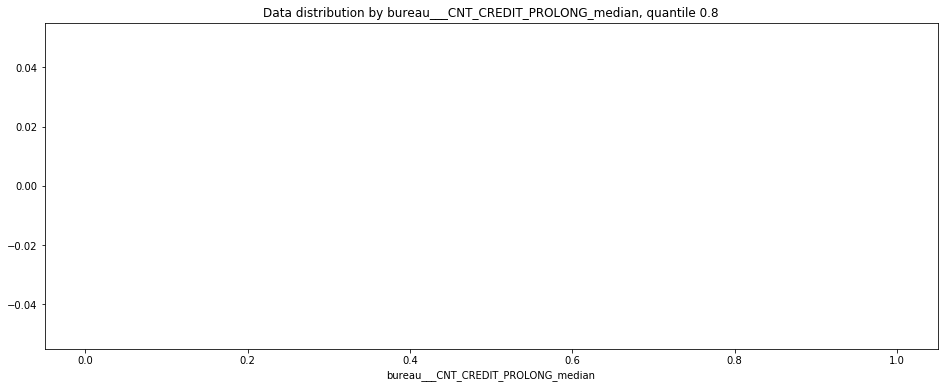

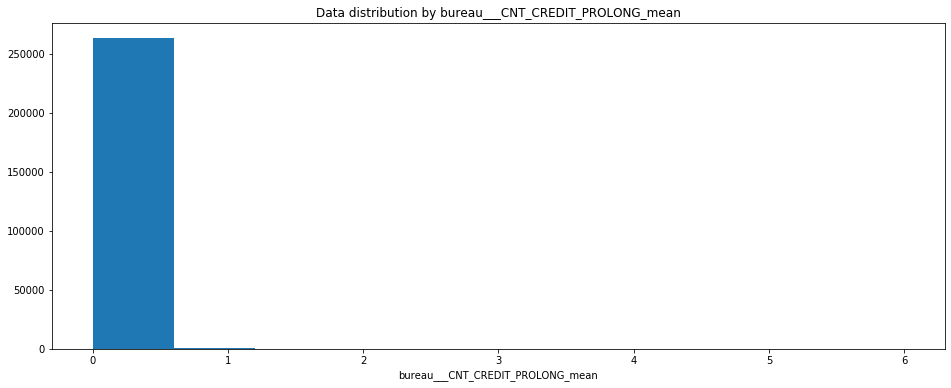

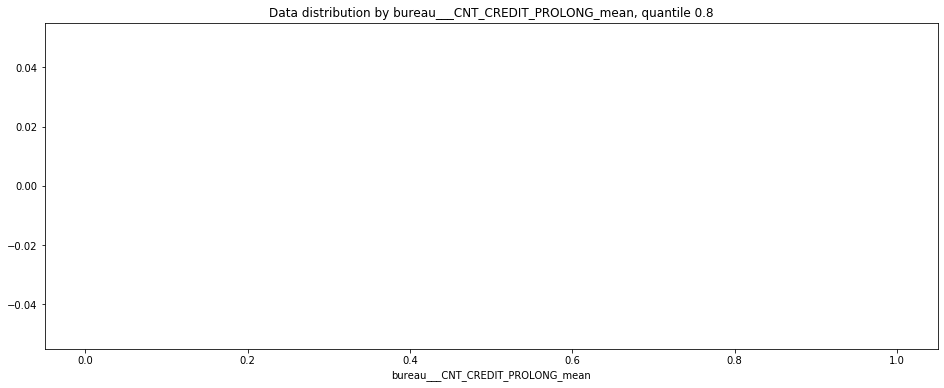

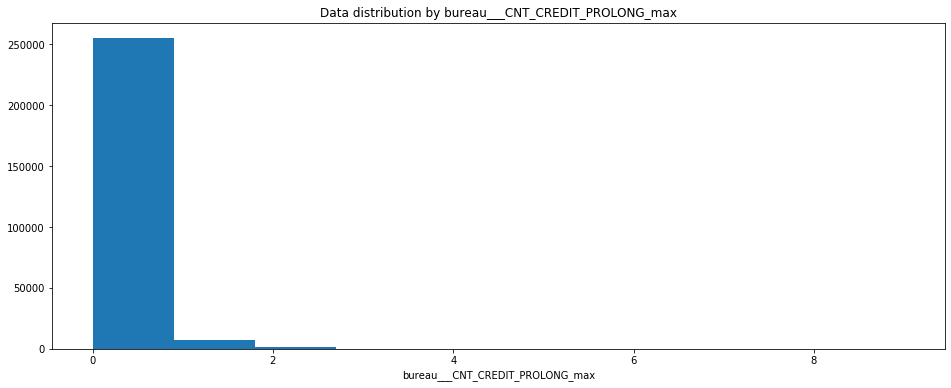

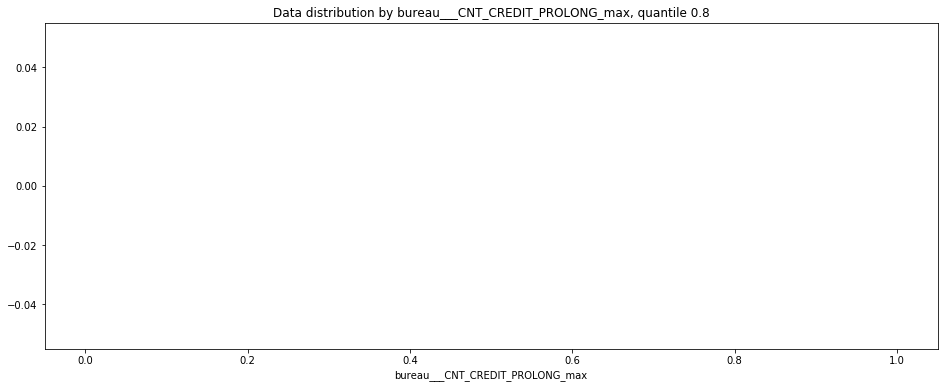

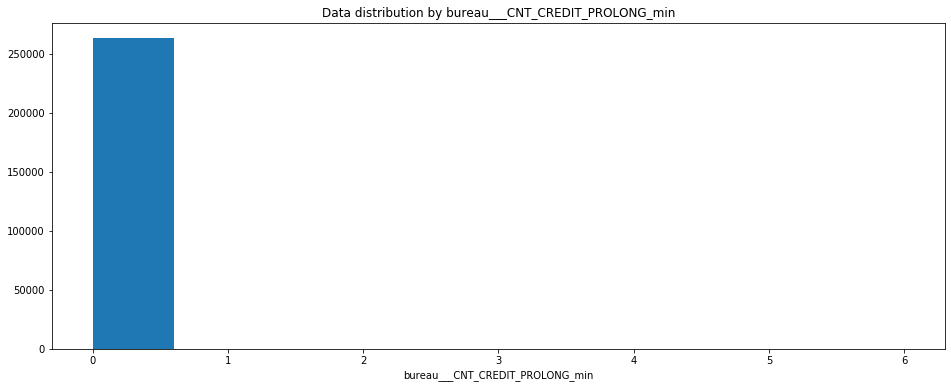

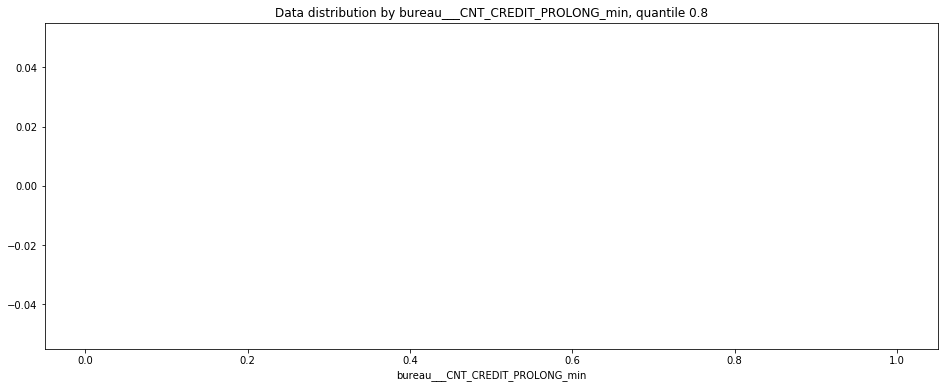

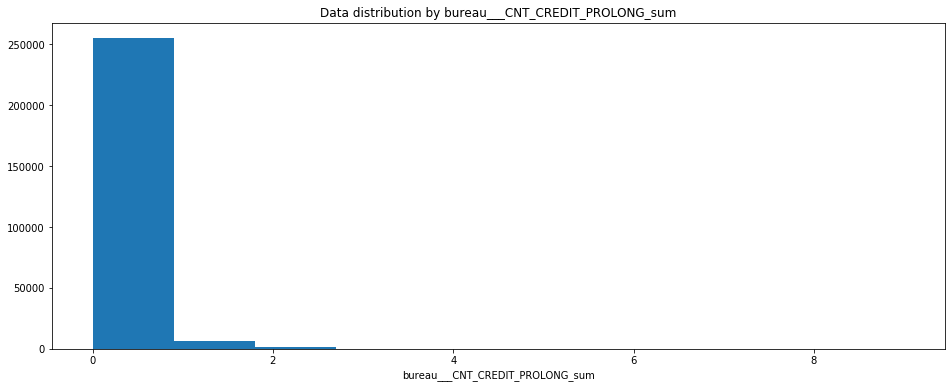

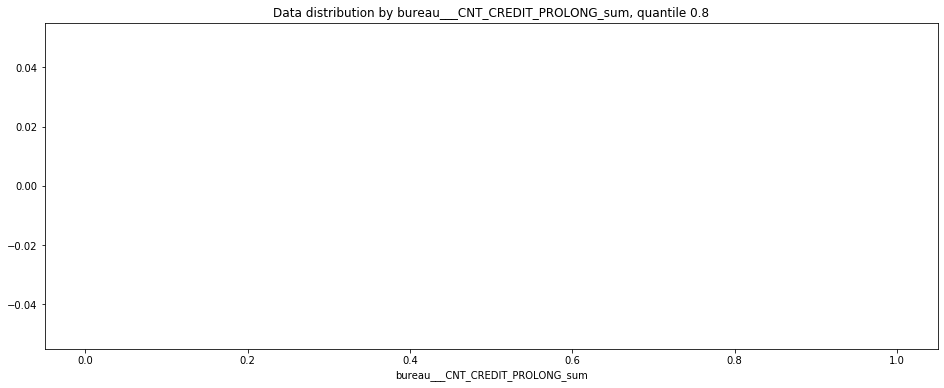

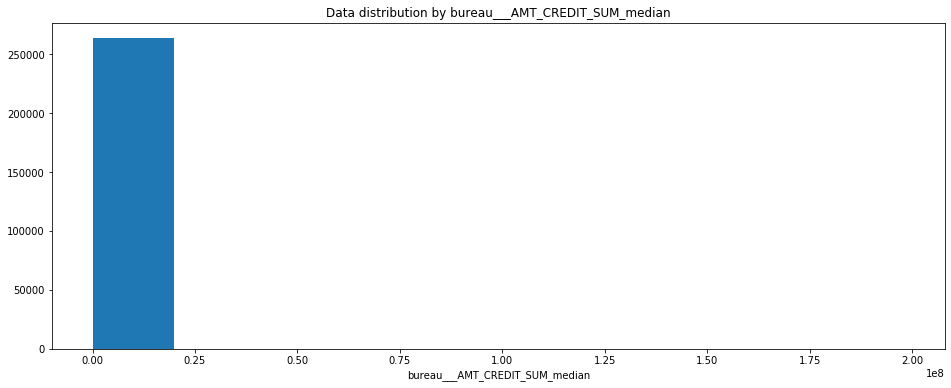

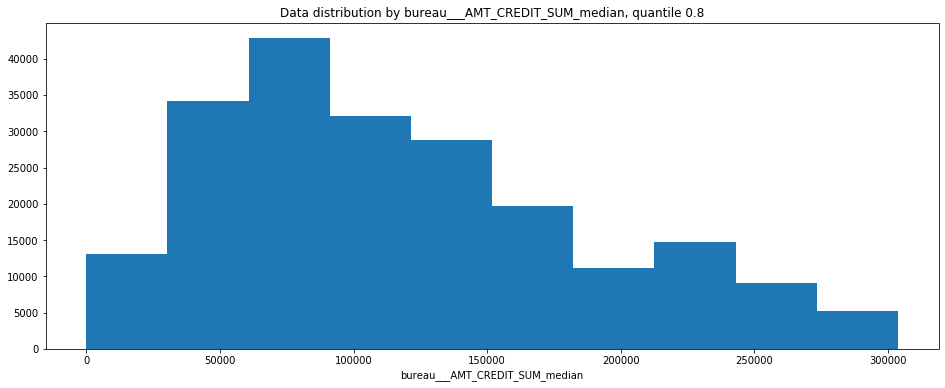

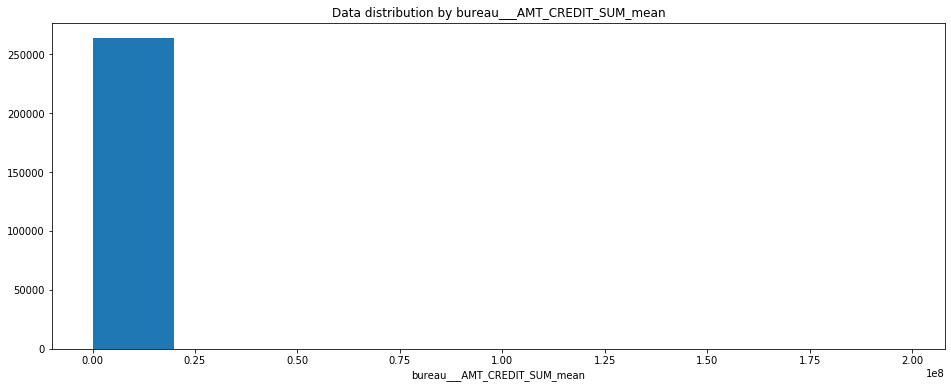

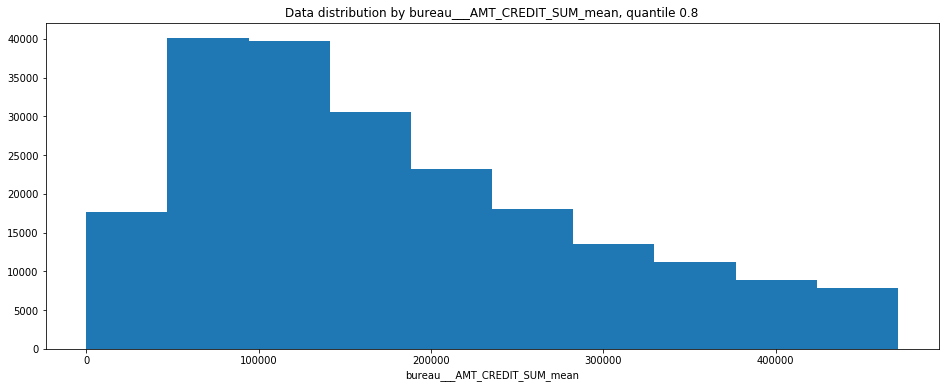

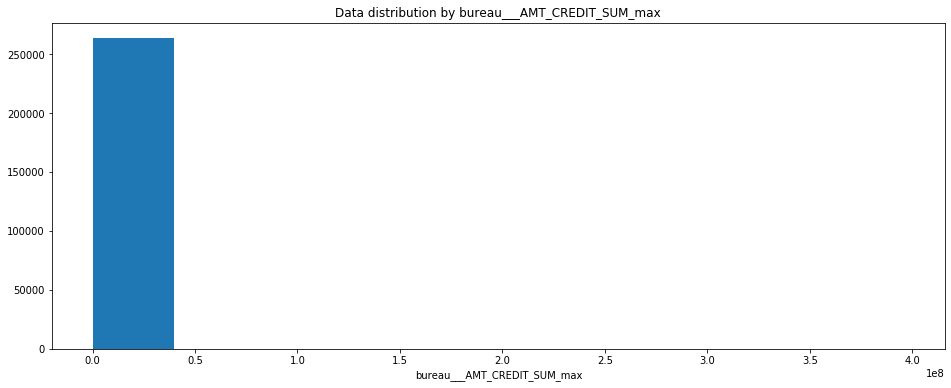

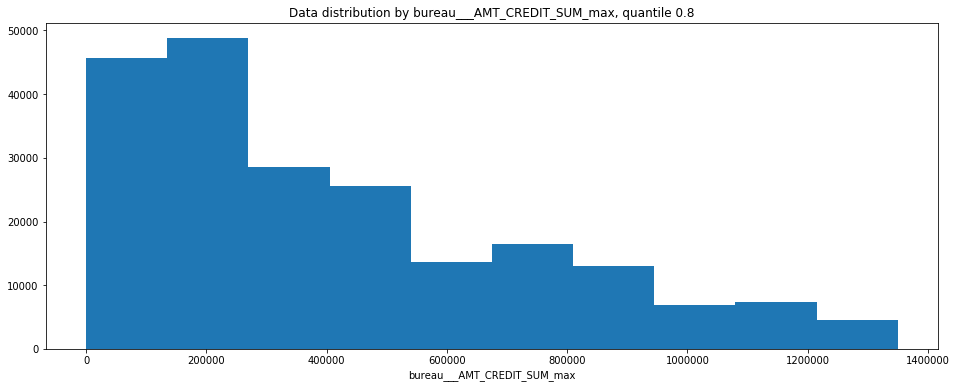

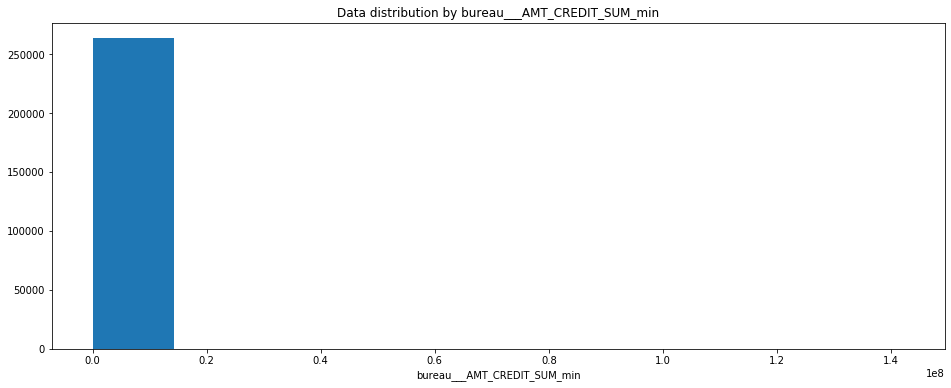

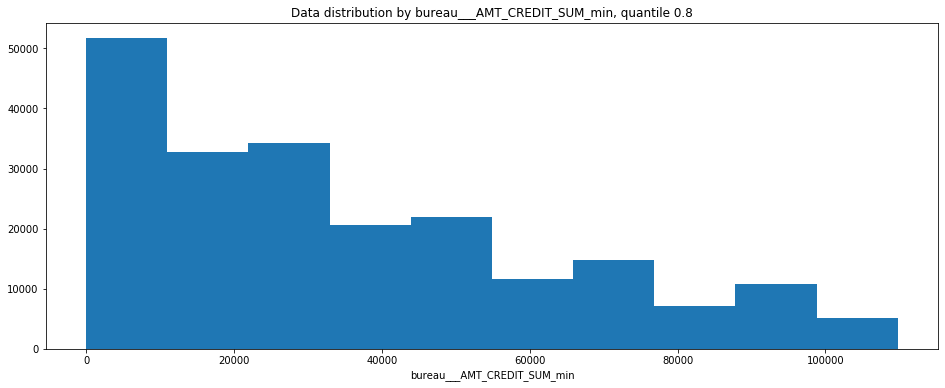

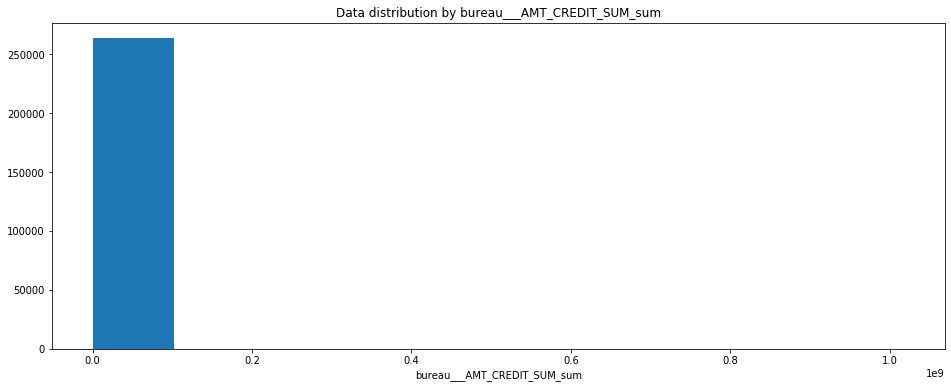

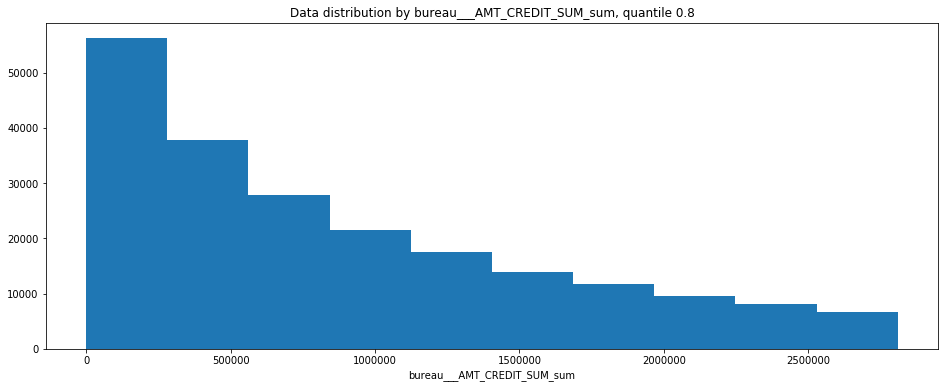

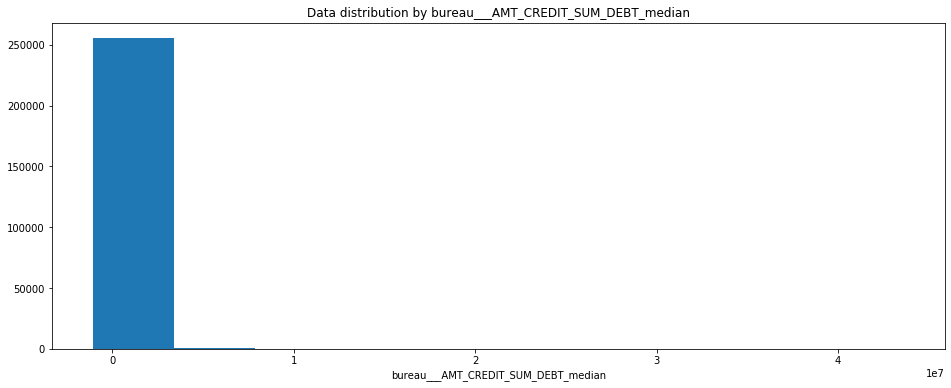

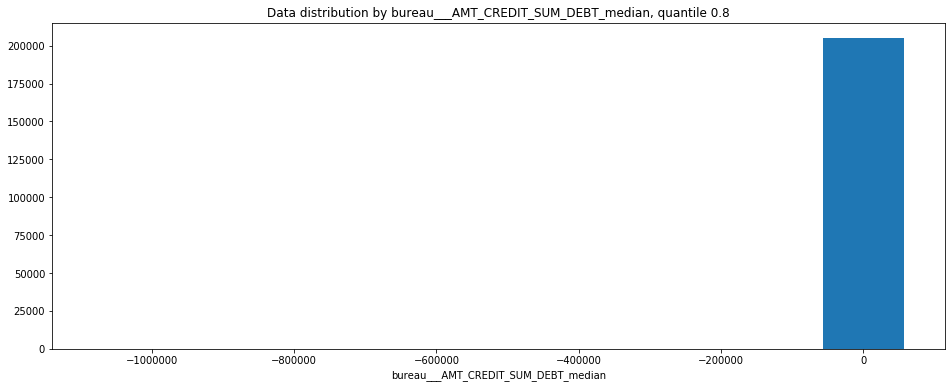

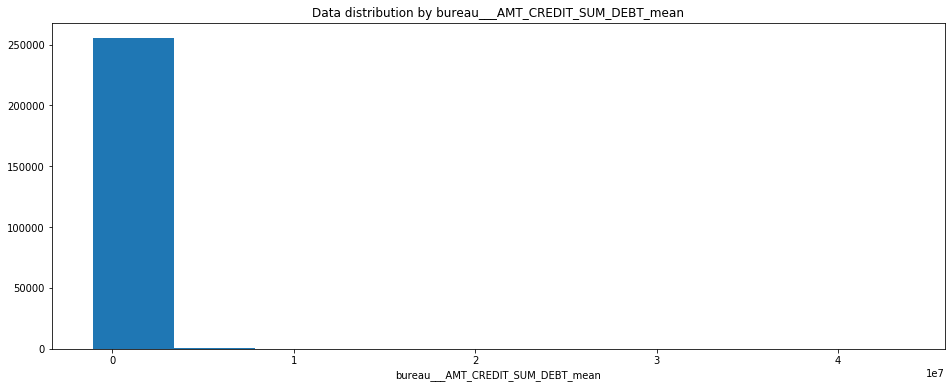

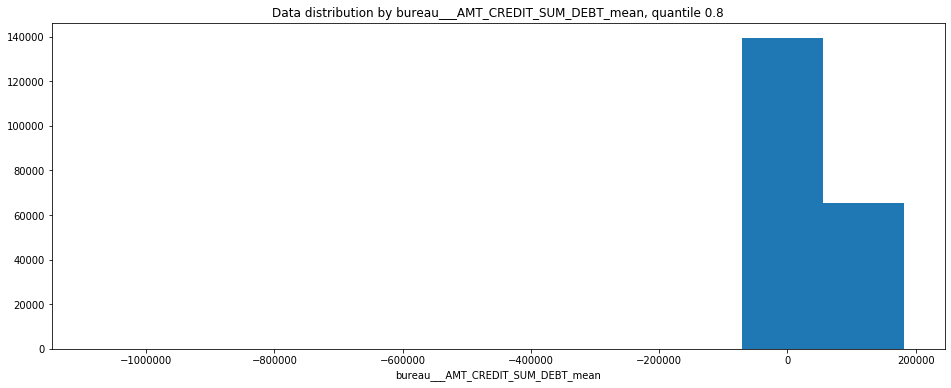

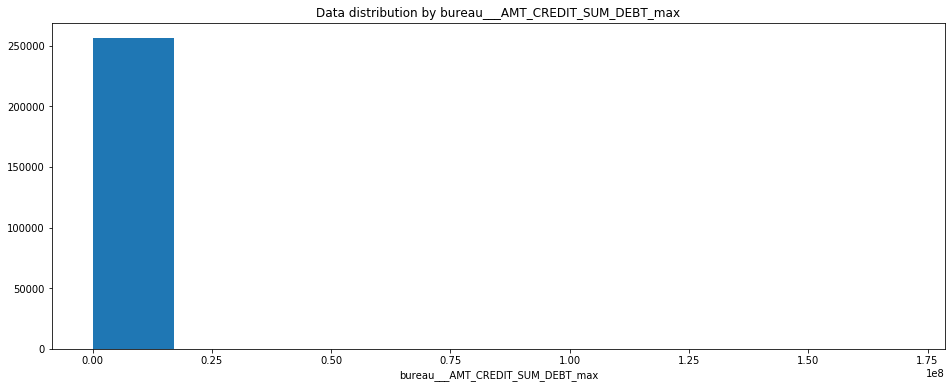

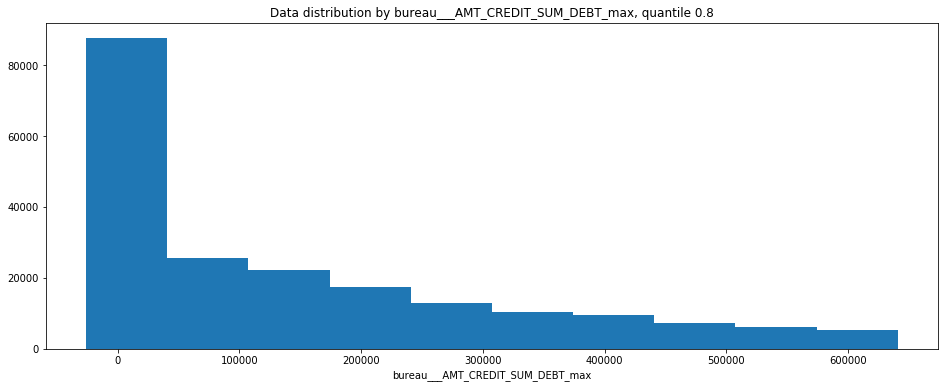

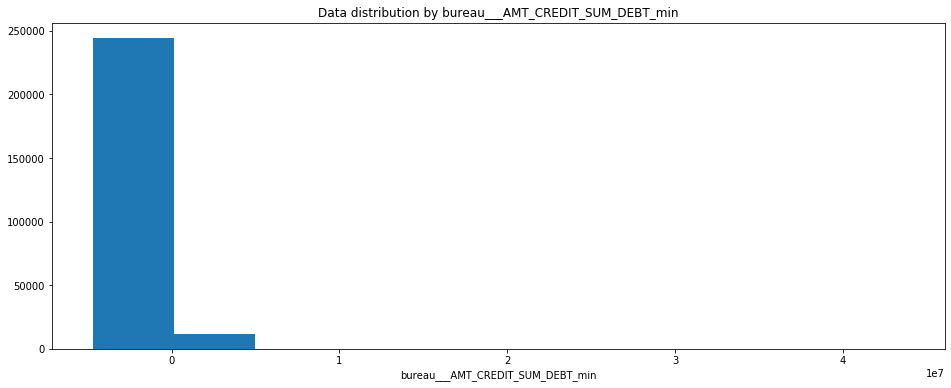

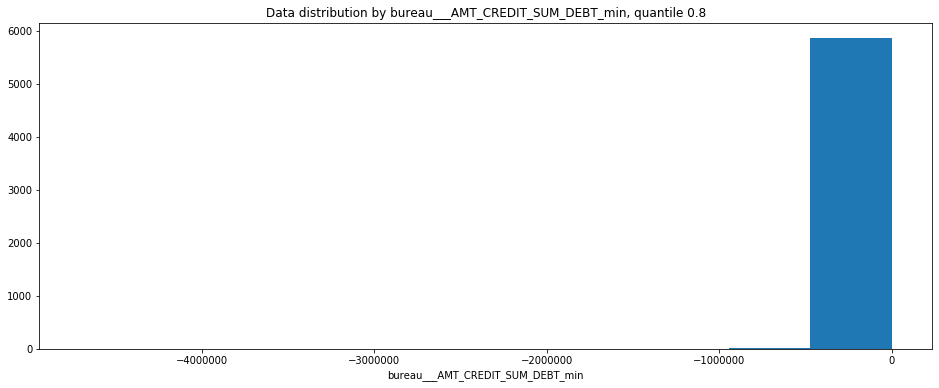

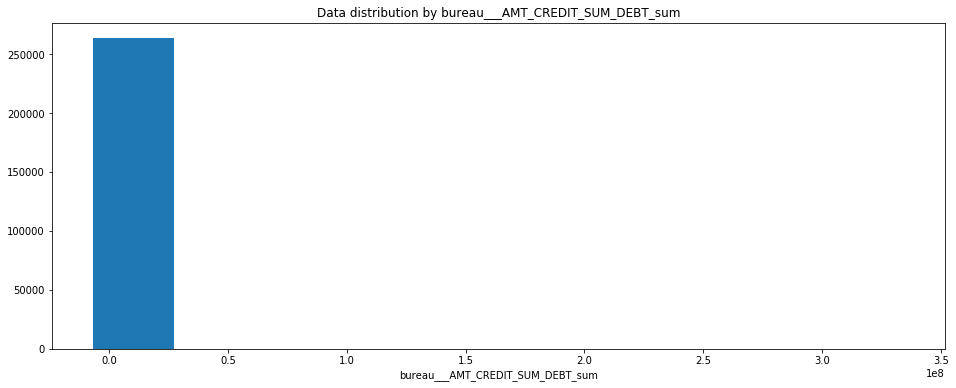

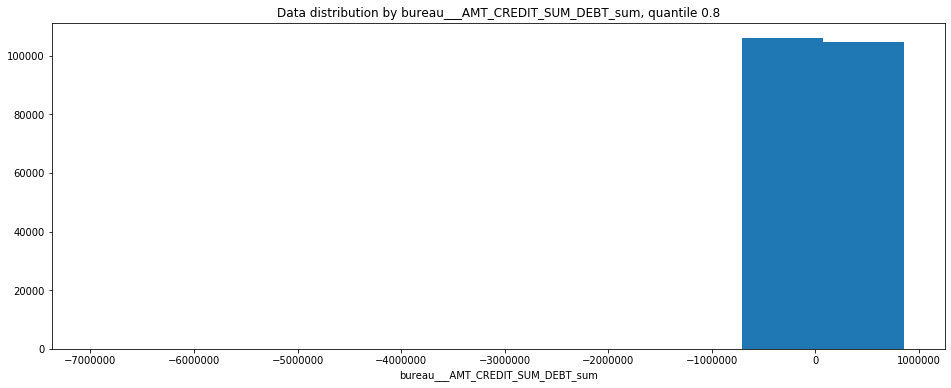

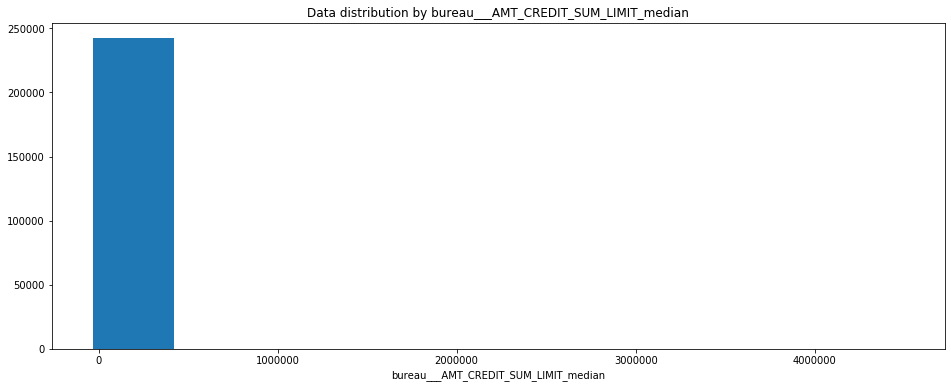

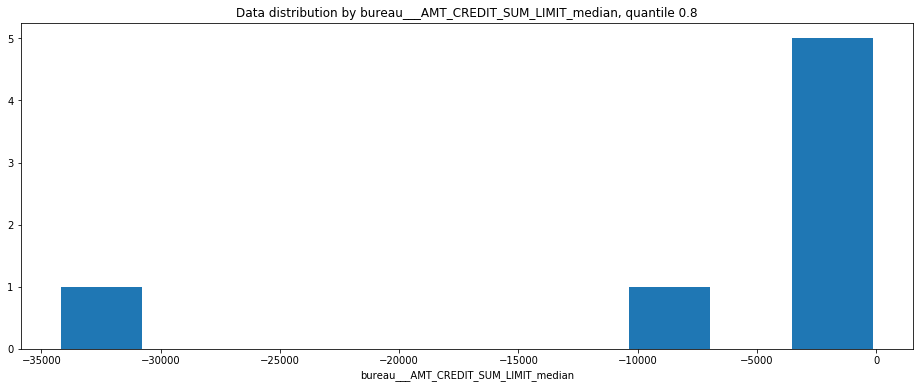

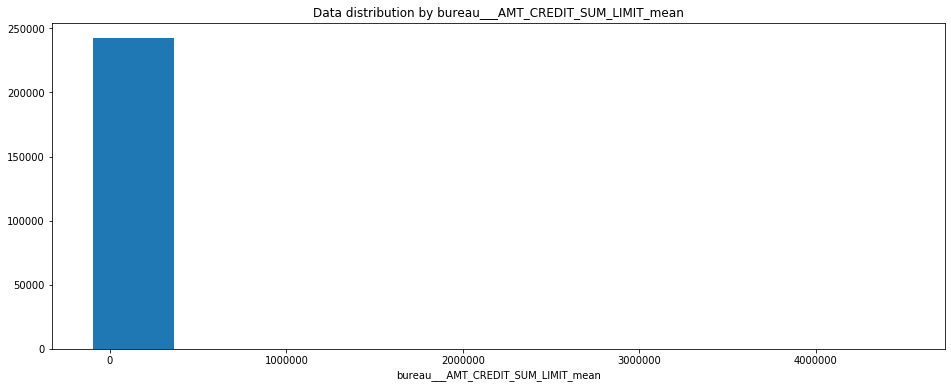

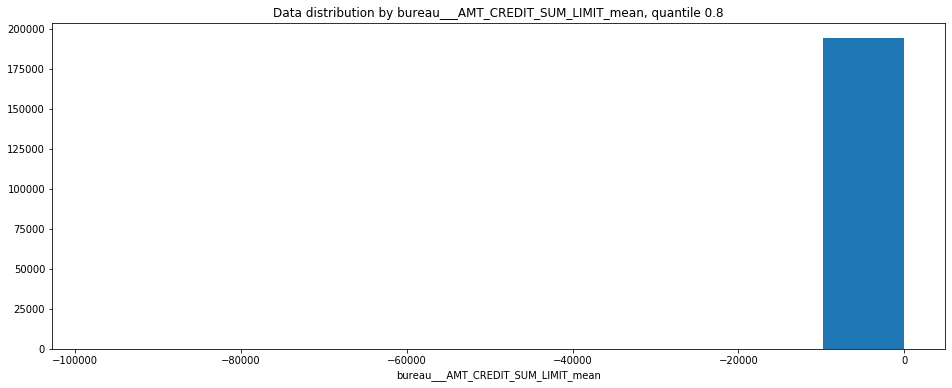

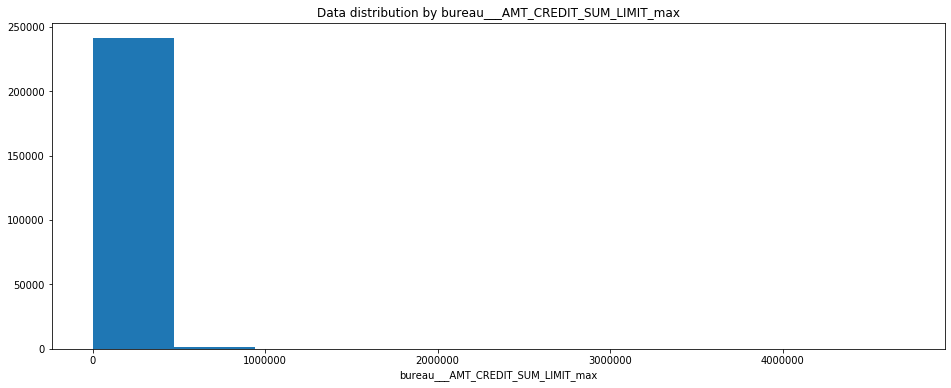

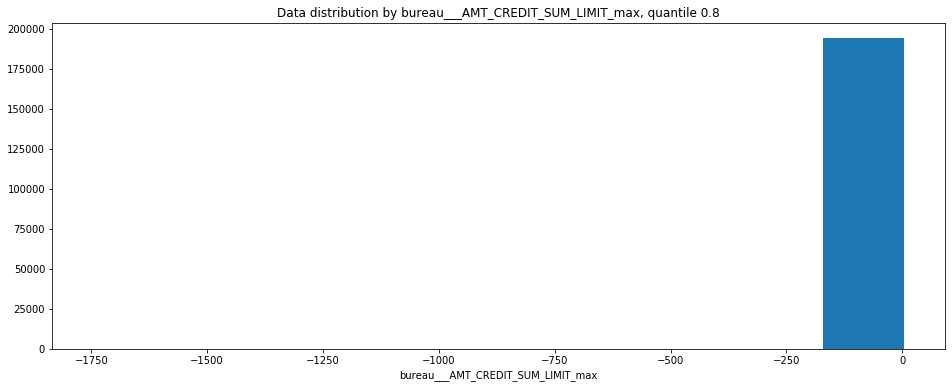

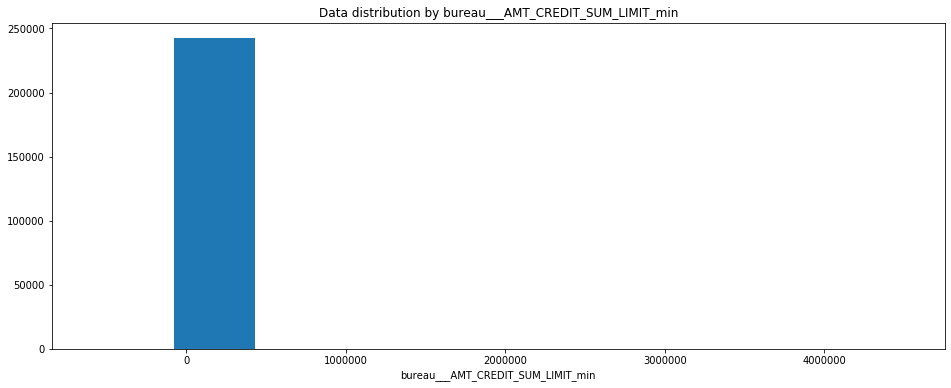

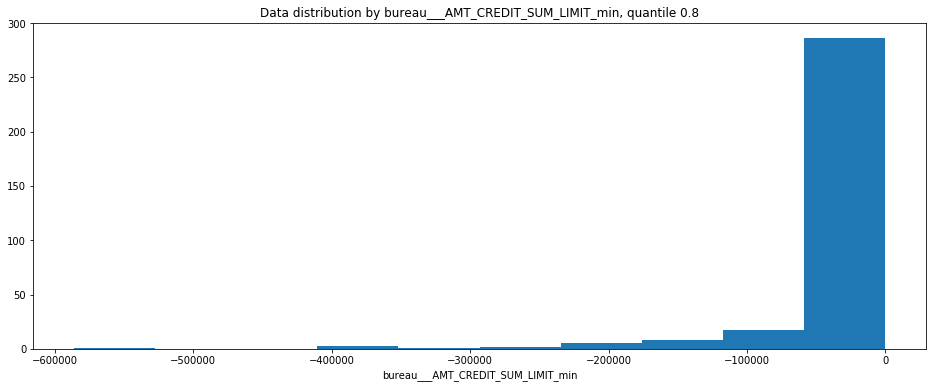

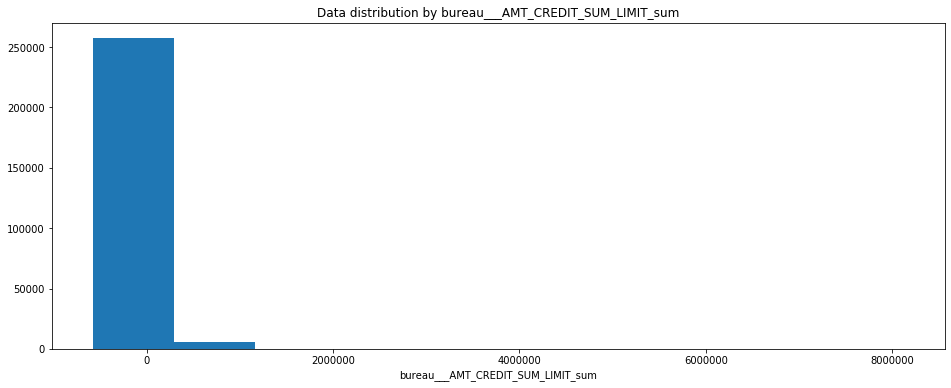

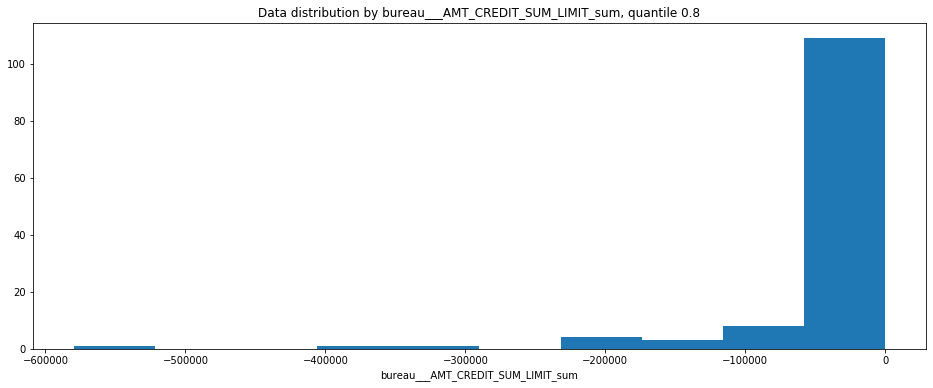

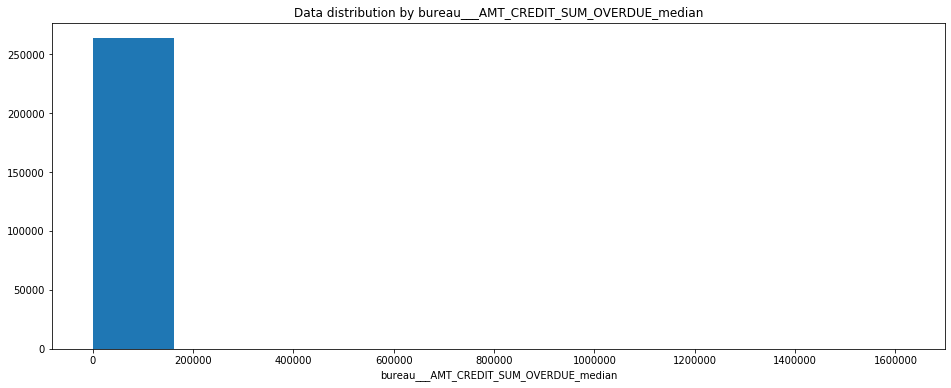

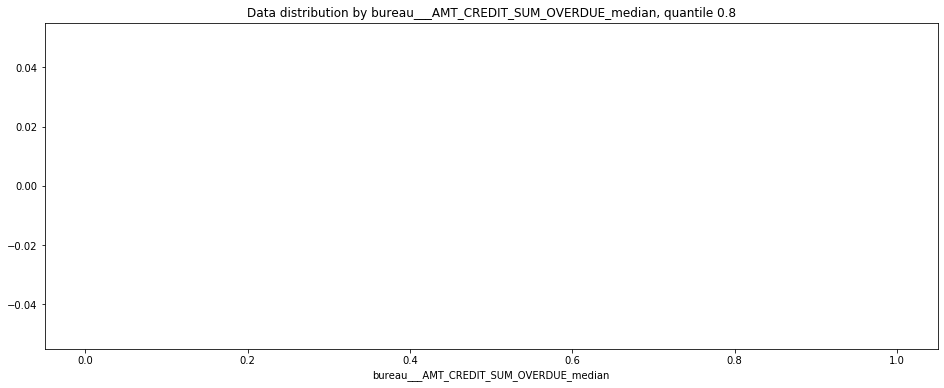

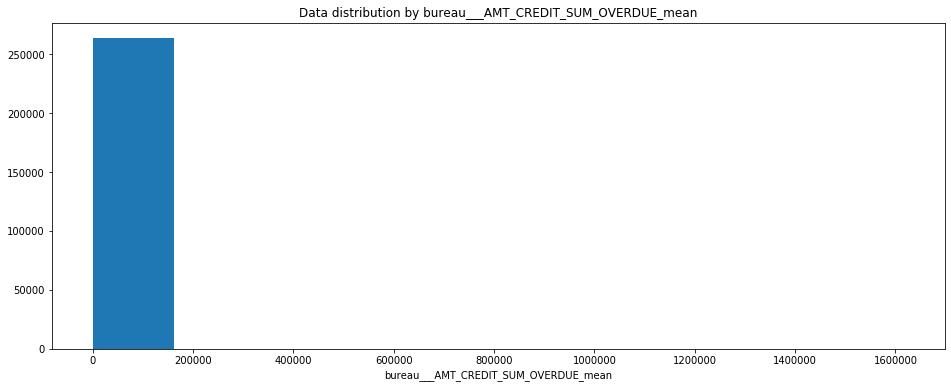

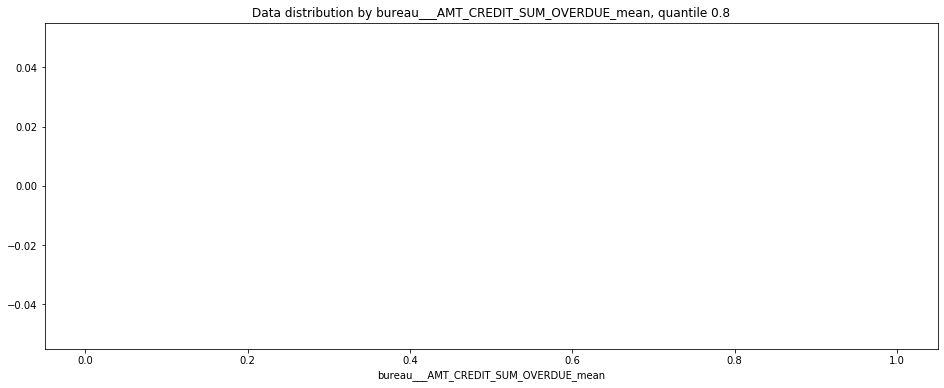

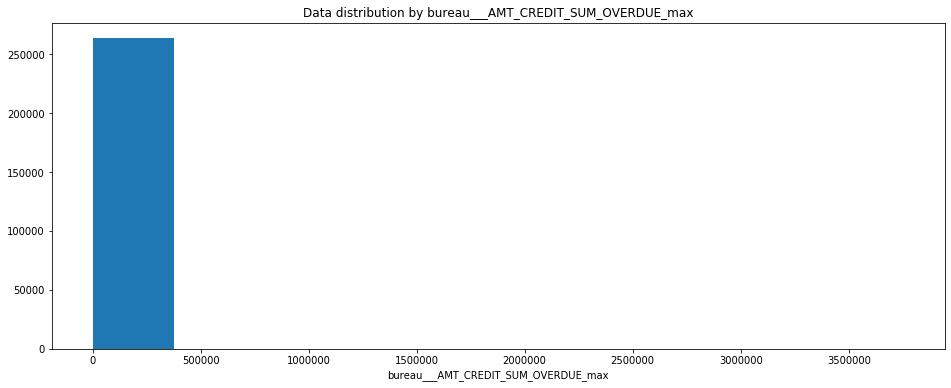

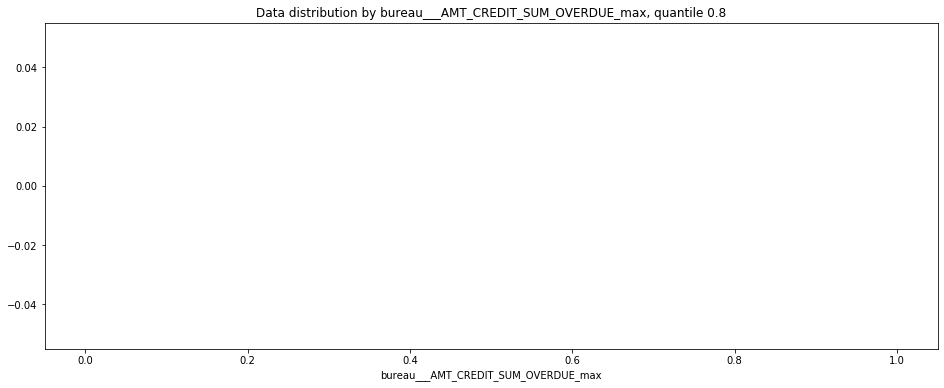

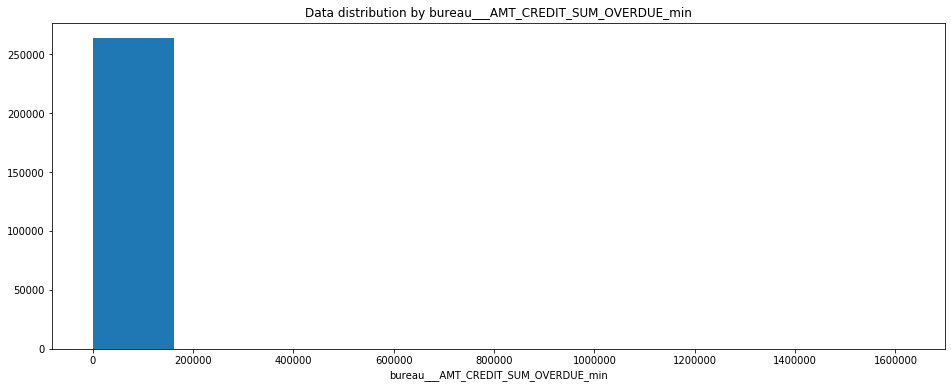

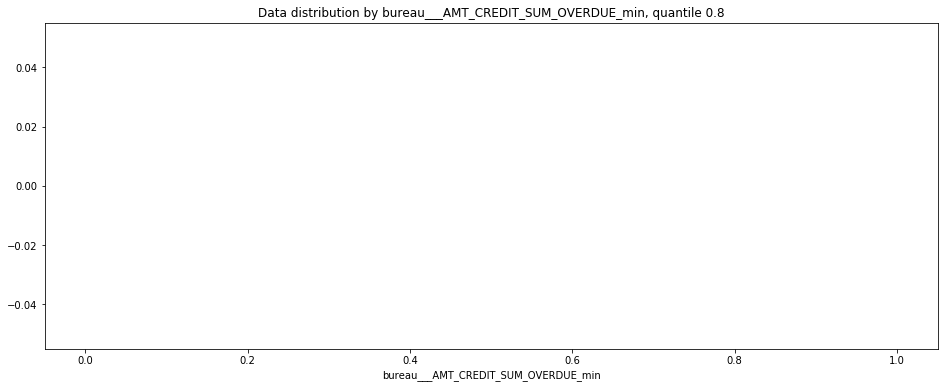

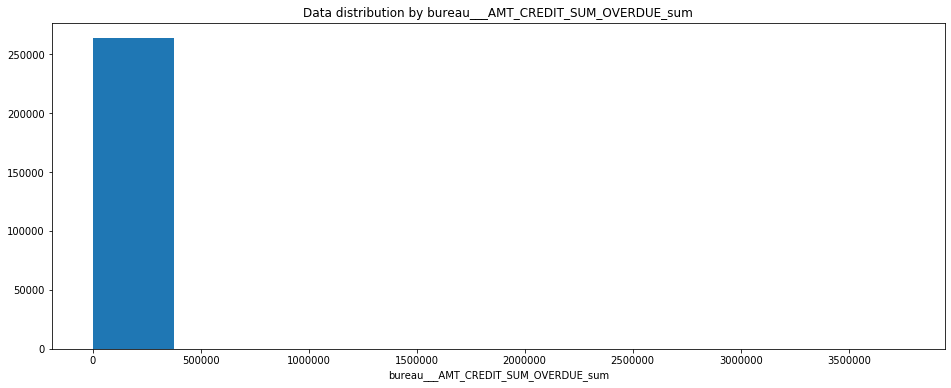

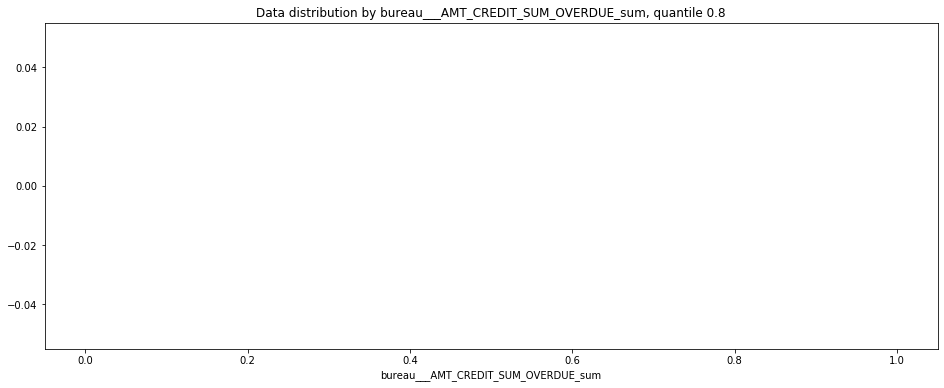

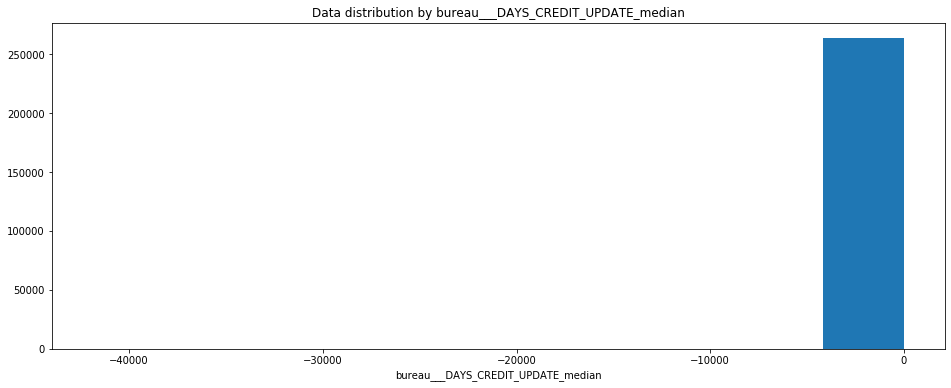

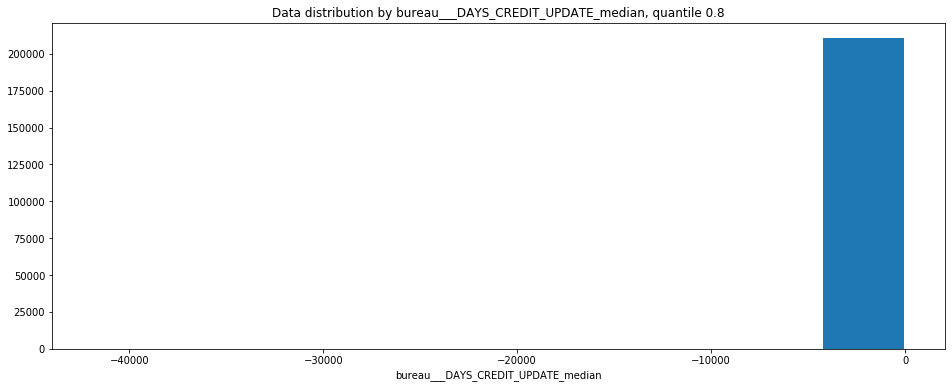

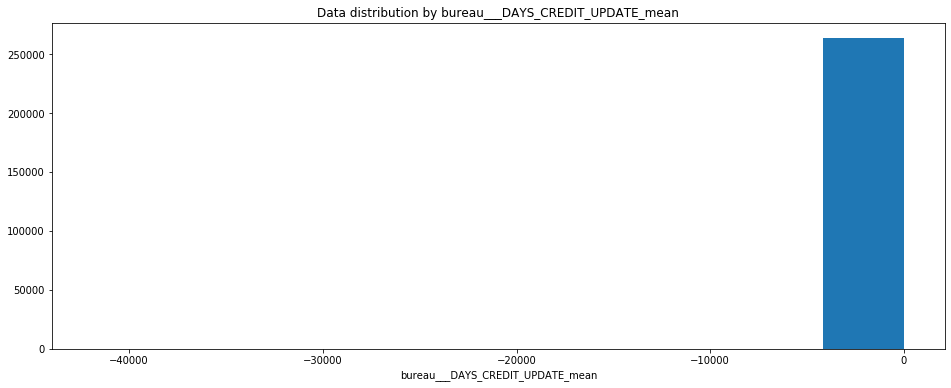

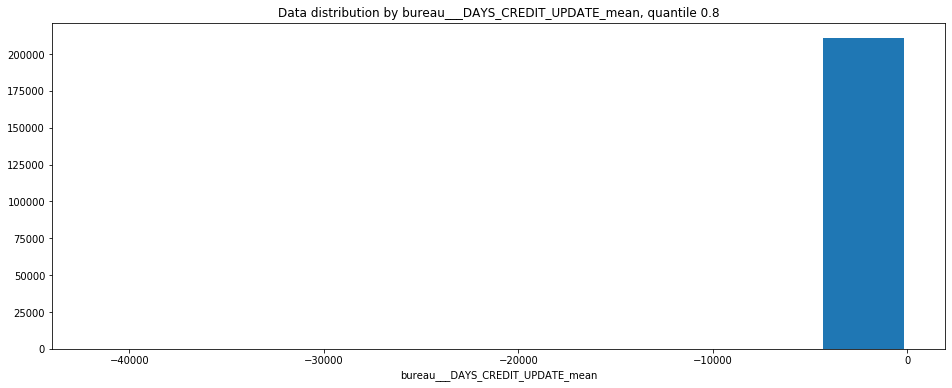

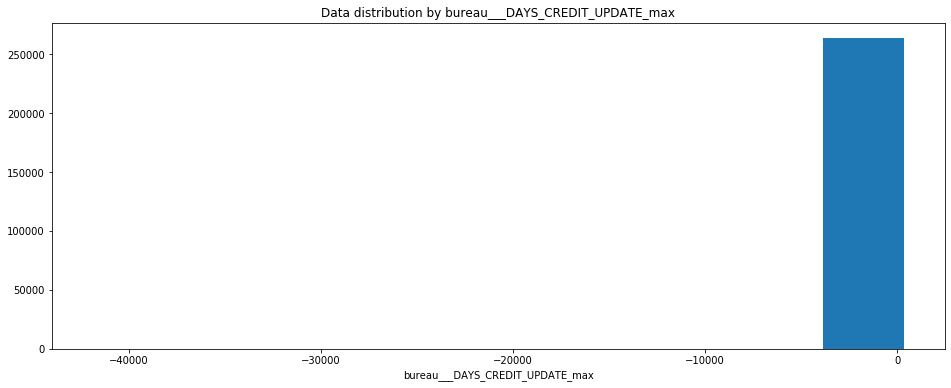

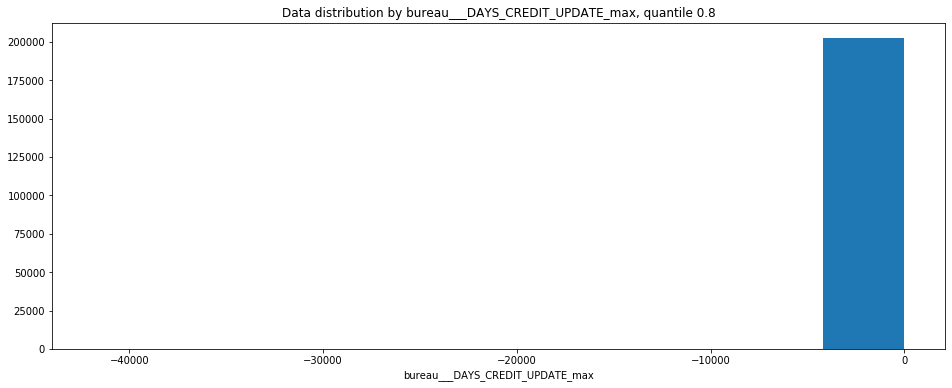

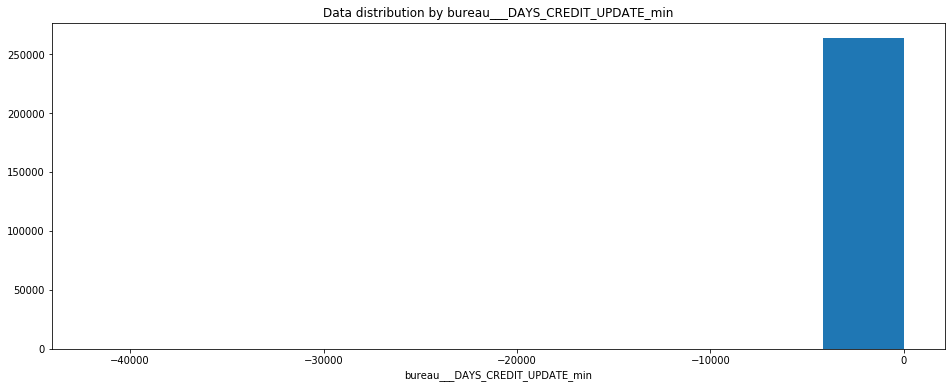

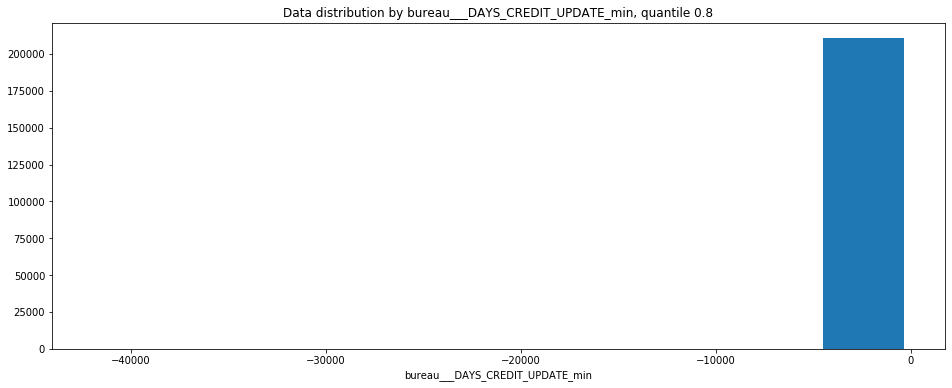

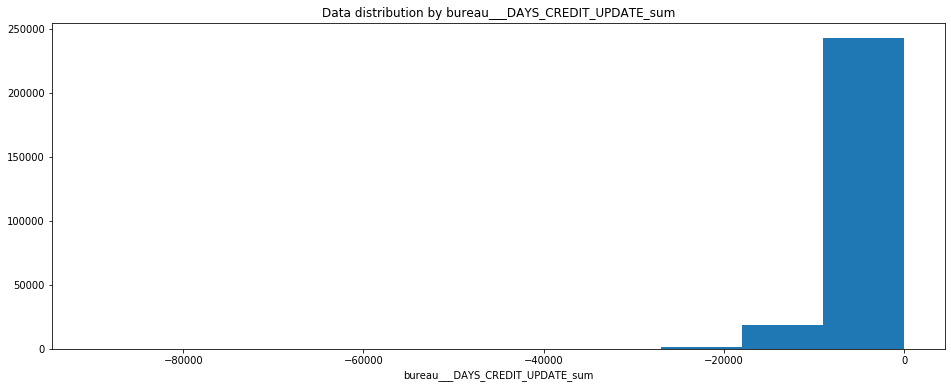

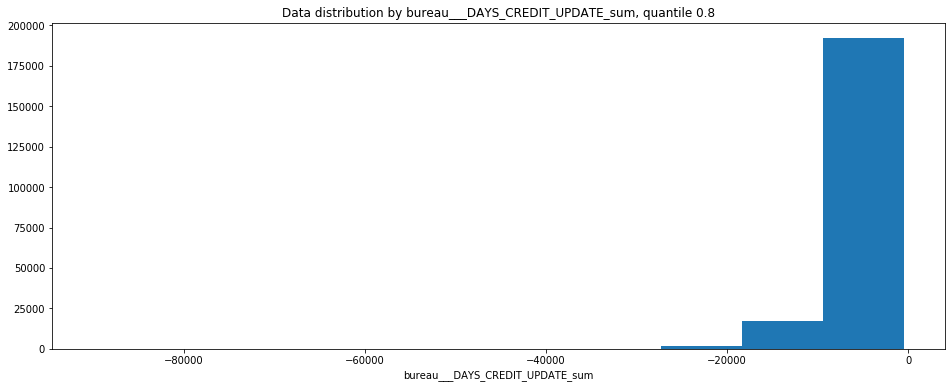

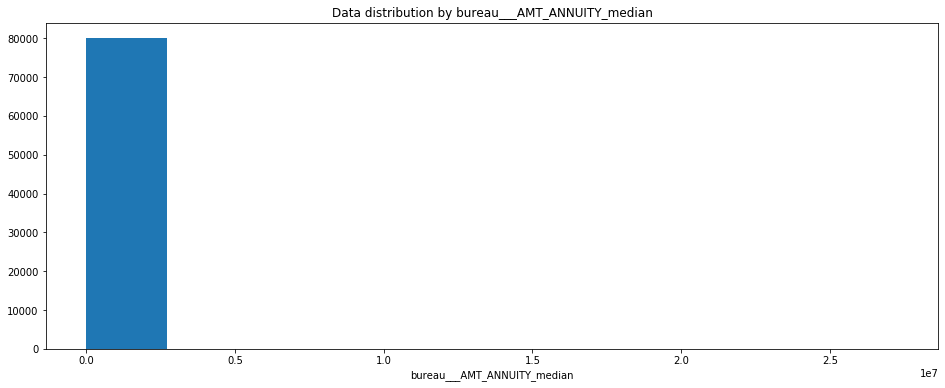

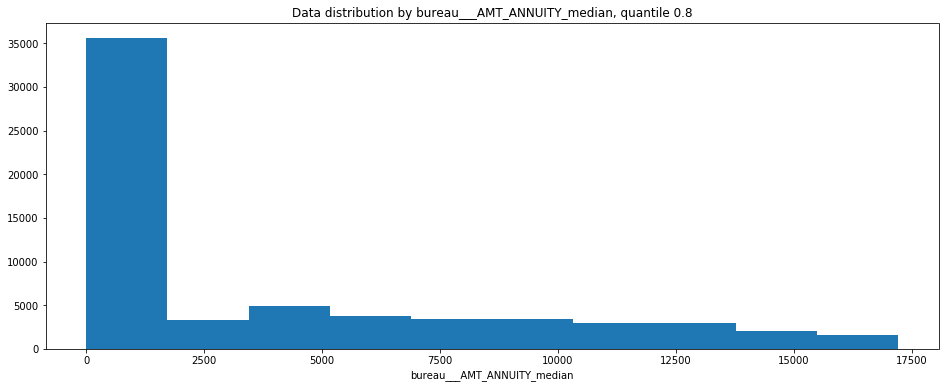

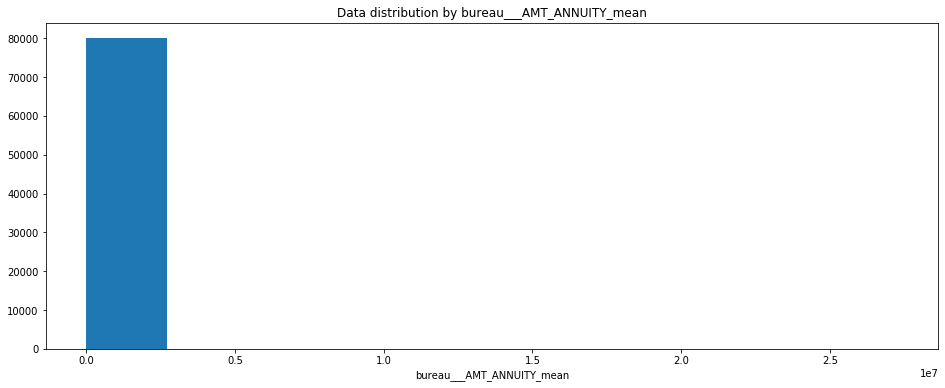

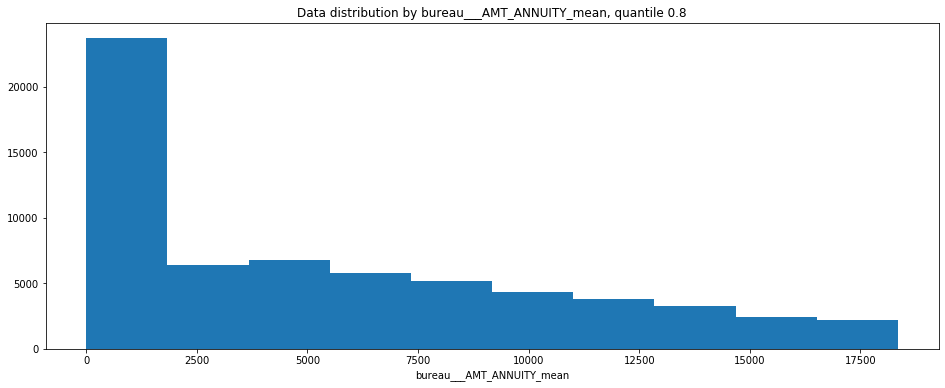

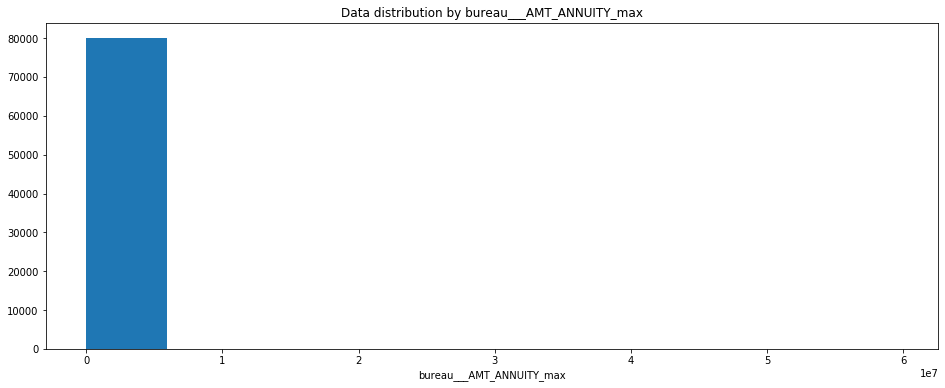

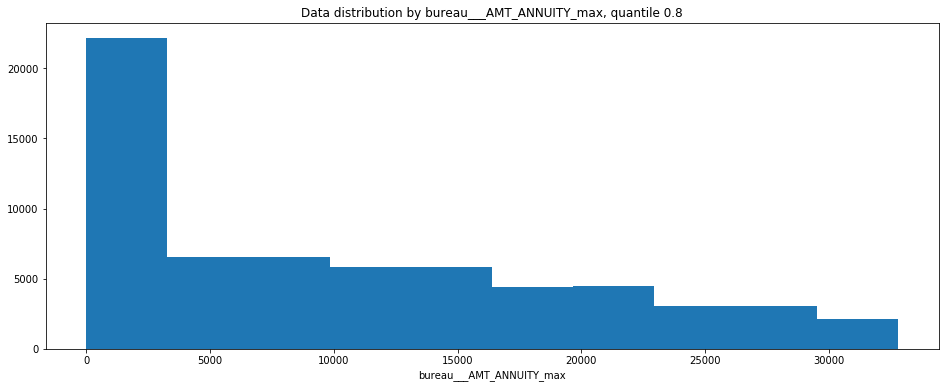

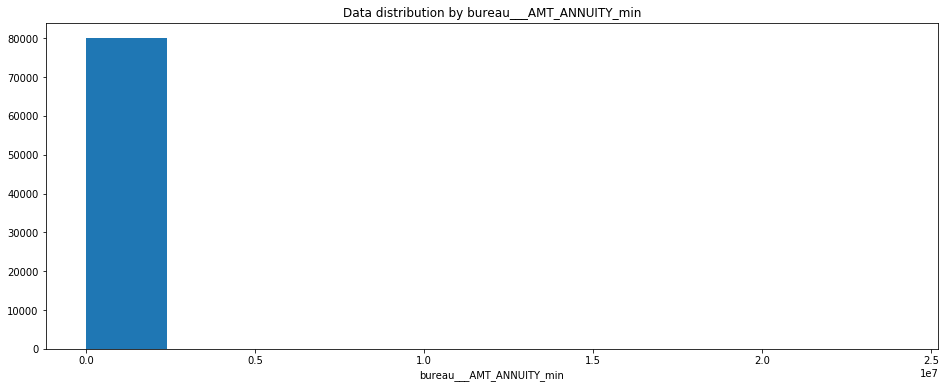

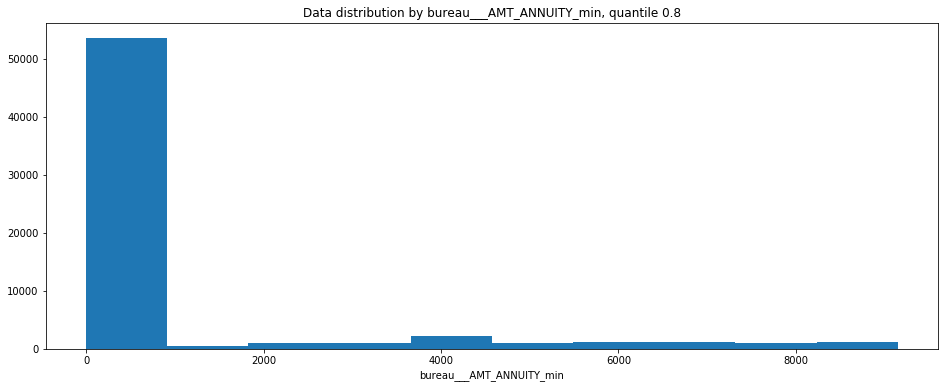

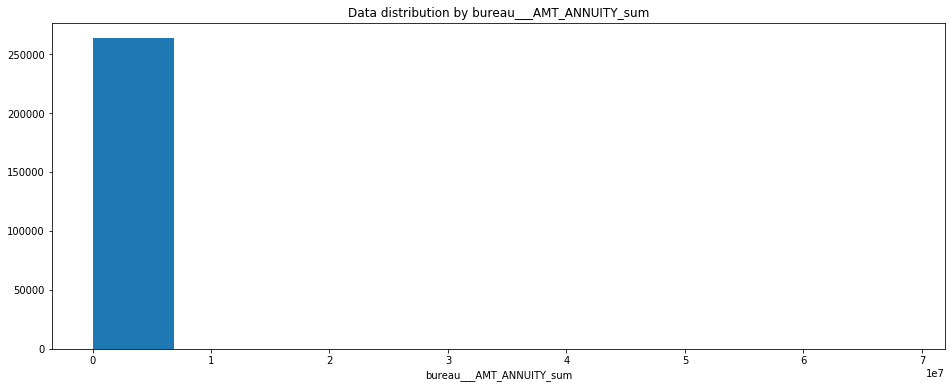

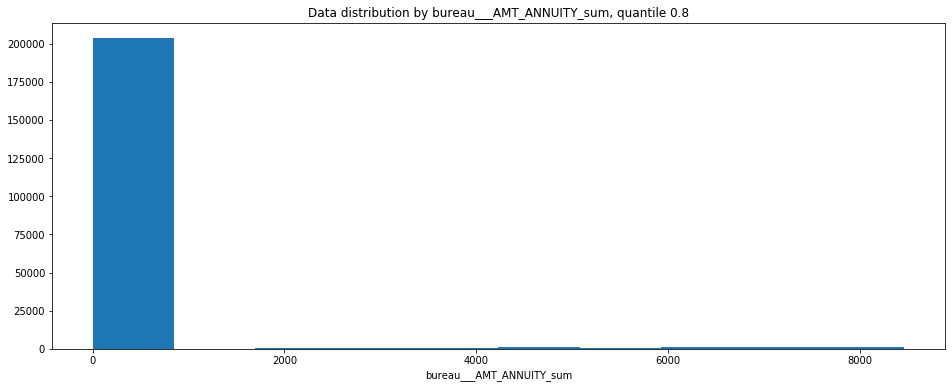

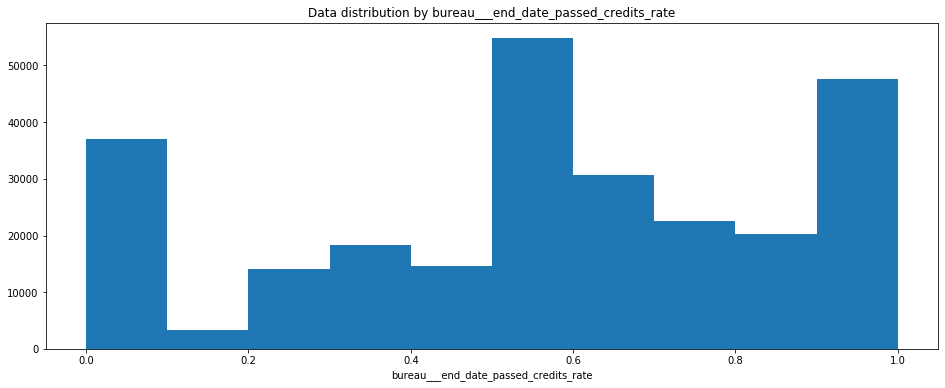

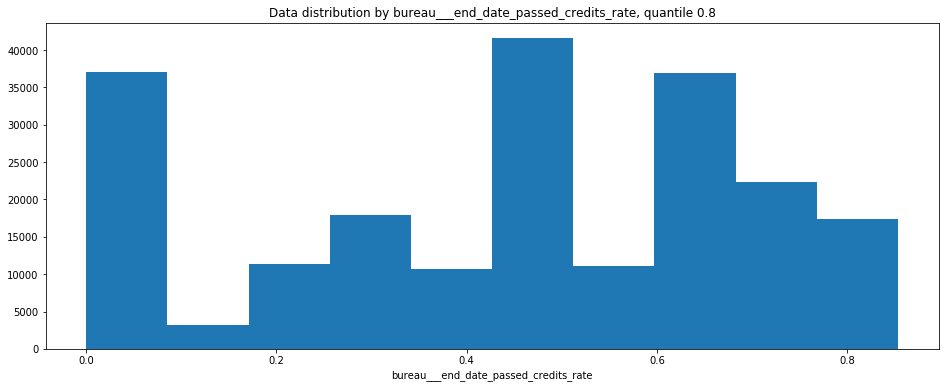

In [16]:
helpers.draw_hists_for_numerical_columns(BUREAU_FEATURES, application, quantile=0.8, bins=10)

In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    application[BUREAU_FEATURES], application['TARGET'], test_size=0.33, random_state=42)

In [19]:
model = lgb.LGBMClassifier(n_estimators=1000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 57)
        

In [20]:
model.fit(X_train, y_train, eval_metric = 'auc',
                  eval_set = [(X_test, y_test), (X_train, y_train)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.730282	train's binary_logloss: 0.612475	valid's auc: 0.653789	valid's binary_logloss: 0.626205
Early stopping, best iteration is:
[124]	train's auc: 0.708583	train's binary_logloss: 0.625756	valid's auc: 0.654907	valid's binary_logloss: 0.634514


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=1000,
               objective='binary', random_state=57, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

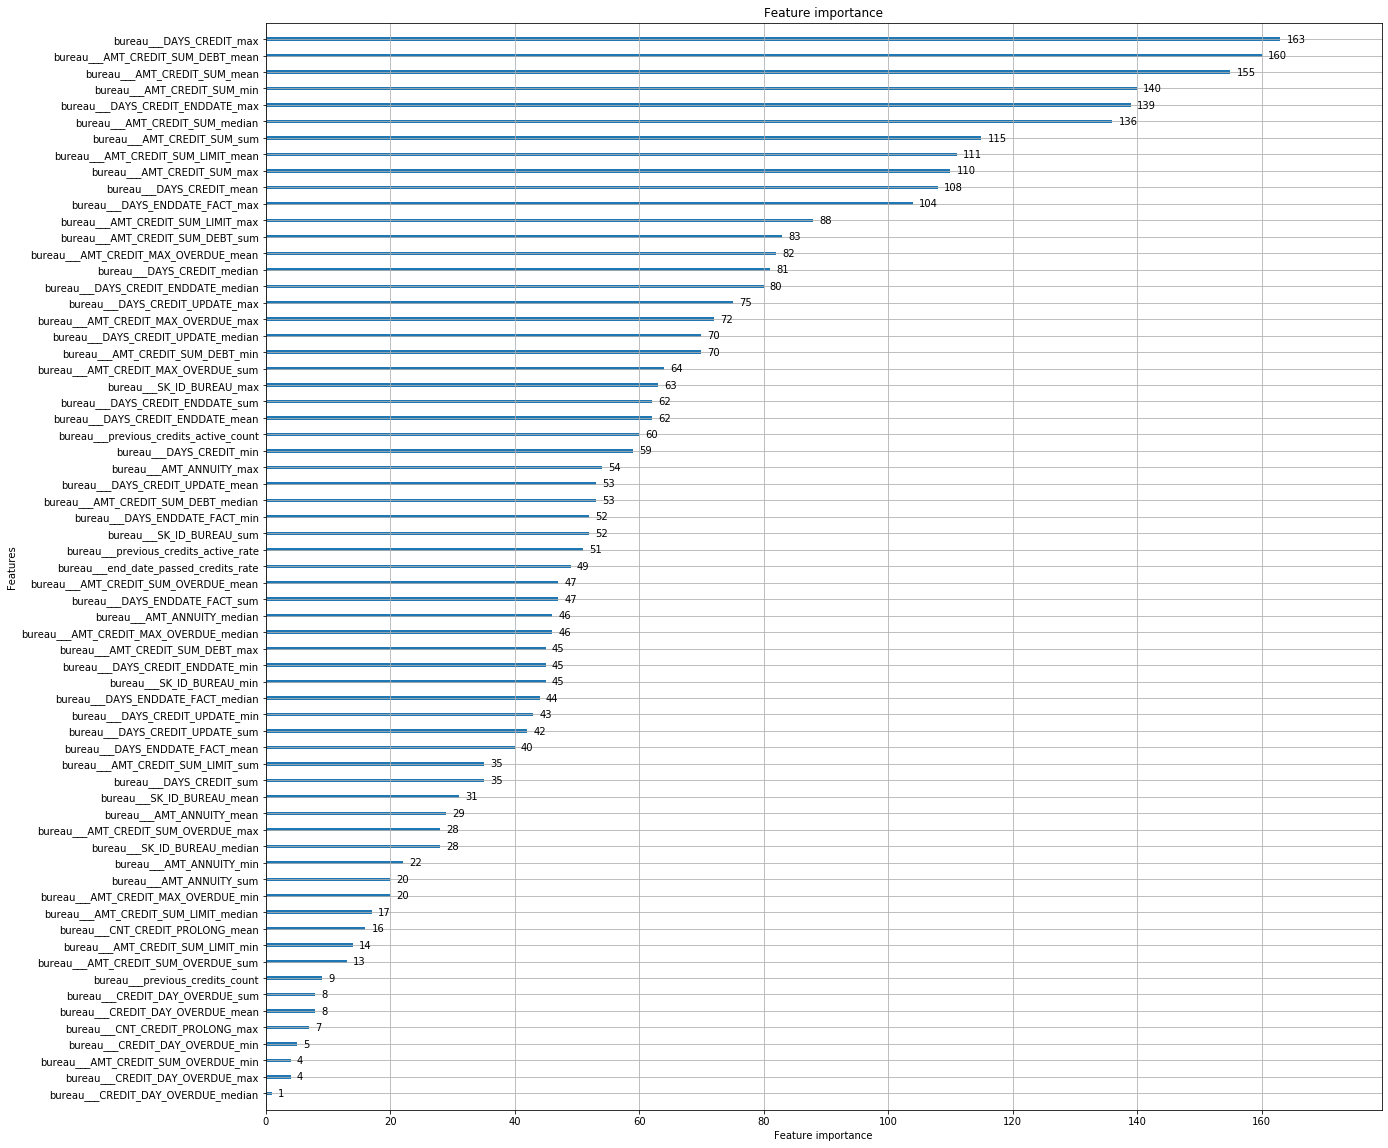

In [21]:
lgb.plot_importance(model, figsize=(20,20))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

In [23]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, BUREAU_FEATURES),
#         ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [24]:
clf.fit(X_train, y_train)
print('test: ', roc_auc_score(clf.predict(X_test), y_test))
print('train: ', roc_auc_score(clf.predict(X_train), y_train))

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


test:  0.7327590068700567
train:  0.7159040256160061


In [25]:
bureau_corrs = []

for col in BUREAU_FEATURES:
    corr = y_train.corr(X_train[col])
    bureau_corrs.append((col, corr))

In [26]:
bureau_corrs = sorted(bureau_corrs, key=lambda x: abs(x[1]), reverse=True)
bureau_corrs

[('bureau___DAYS_CREDIT_mean', 0.08899454577571167),
 ('bureau___DAYS_CREDIT_median', 0.08483359003559862),
 ('bureau___previous_credits_active_rate', 0.07761159764881786),
 ('bureau___DAYS_CREDIT_min', 0.07506976601041786),
 ('bureau___end_date_passed_credits_rate', -0.07132846413082271),
 ('bureau___DAYS_CREDIT_UPDATE_mean', 0.06900914212839798),
 ('bureau___DAYS_CREDIT_UPDATE_median', 0.06759727042580818),
 ('bureau___DAYS_ENDDATE_FACT_min', 0.057408941274561476),
 ('bureau___DAYS_ENDDATE_FACT_mean', 0.05425294585287469),
 ('bureau___DAYS_ENDDATE_FACT_median', 0.051816509634135574),
 ('bureau___DAYS_CREDIT_ENDDATE_sum', 0.0512240936095046),
 ('bureau___DAYS_ENDDATE_FACT_sum', 0.0496793293535172),
 ('bureau___DAYS_CREDIT_max', 0.04950219453810931),
 ('bureau___DAYS_CREDIT_ENDDATE_mean', 0.044404666716113685),
 ('bureau___previous_credits_active_count', 0.04344032316666297),
 ('bureau___previous_credits_closed_count', 0.04344032316666297),
 ('bureau___DAYS_CREDIT_UPDATE_min', 0.043109

In [31]:
t = pd.read_csv('data/bureau.csv')
application = pd.read_csv('data/application_test.csv')
application, BUREAU_FEATURES = add_bureau_features(application, t)

In [32]:
ans = model.predict(application[BUREAU_FEATURES])

In [33]:
helpers.create_submission(ans).to_csv('ans1.csv', index = False)

## bureau_balance

Описание из соревнования:

***

`
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.`

***

- *MONTHS_BALANCE* - Month of balance relative to application date (-1 means the freshest balance date) 

- *STATUS* - Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] ) 

In [ ]:
BUREAU_BALANCE = pd.read_csv('data/bureau_balance.csv')

In [ ]:
BUREAU_BALANCE.sample(7, random_state=57)

In [ ]:
BUREAU_BALANCE.shape

In [ ]:
helpers.get_df_general_stats(BUREAU_BALANCE)

In [ ]:
helpers.draw_hists_for_categorical_columns(['STATUS'], BUREAU_BALANCE)

In [ ]:
helpers.draw_hists_for_numerical_columns(['MONTHS_BALANCE'], BUREAU_BALANCE, quantile=0.8, bins=10)